📌 Introduction

Credit card fraud detection is a critical problem in the financial sector, where identifying fraudulent transactions quickly can prevent significant financial losses. The dataset contains anonymized transaction features (V1–V28), along with transaction Time, Amount, and a target variable Class (0 = Legitimate, 1 = Fraud).

This project begins with Exploratory Data Analysis (EDA) to understand data distribution, class imbalance, and feature behavior, followed by building a Logistic Regression model to classify fraudulent transactions.

Problem Statement

The dataset is highly imbalanced, with fraudulent transactions representing only a small percentage of total transactions. This imbalance makes fraud detection challenging, as traditional models may become biased toward predicting non-fraud cases.

The goal is to analyze transaction patterns and build a Logistic Regression model that can effectively distinguish fraudulent transactions from legitimate ones while handling class imbalance.

Objectives

Perform EDA to understand feature distributions and class imbalance

Analyze correlations and detect important features

Scale necessary features (Amount, Time)

Handle class imbalance (resampling or class weights)

Build and evaluate a Logistic Regression model

Measure performance using Precision, Recall, F1-score, and ROC-AUC

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns




In [2]:
df=pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

that means only numerical data type

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

no null value

In [8]:
#statistical summary
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


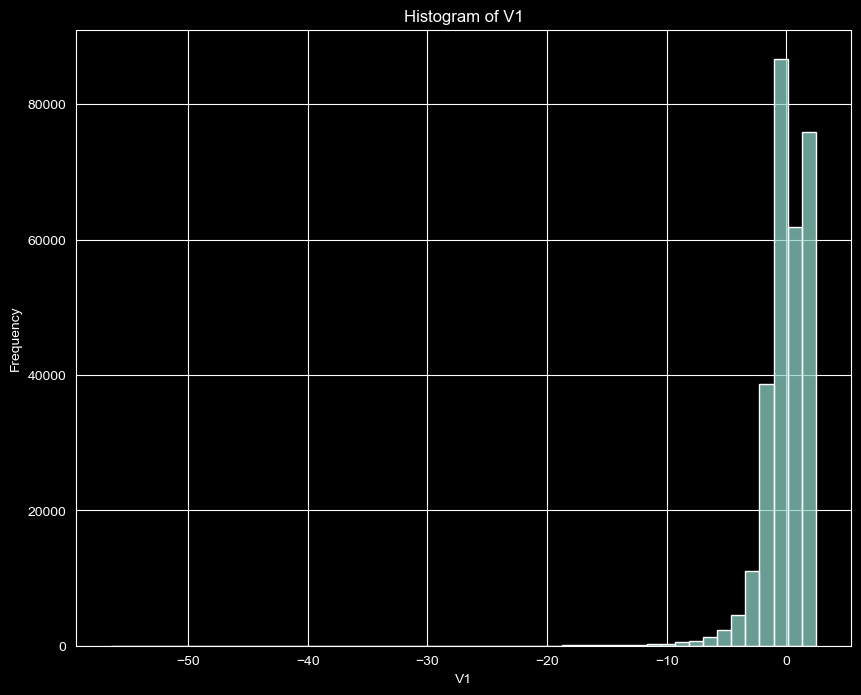


### Univariate Analysis - V1

- Mean: 0.00
- Median: 0.02
- Standard Deviation: 1.96
- Skewness: -3.28 (left-skewed)

**Observation:**
The distribution of **V1** appears left-skewed.
Since this feature is PCA-transformed, its original meaning is not directly interpretable.
However, the spread and shape indicate how transaction patterns vary across this component.

---


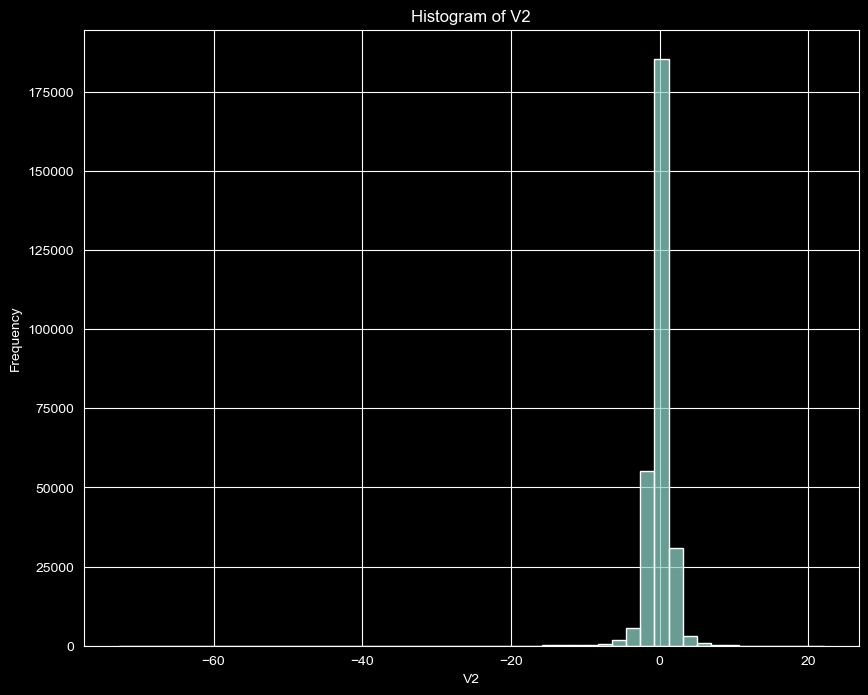


### Univariate Analysis - V2

- Mean: 0.00
- Median: 0.07
- Standard Deviation: 1.65
- Skewness: -4.62 (left-skewed)

**Observation:**
The distribution of **V2** appears left-skewed.
Since this feature is PCA-transformed, its original meaning is not directly interpretable.
However, the spread and shape indicate how transaction patterns vary across this component.

---


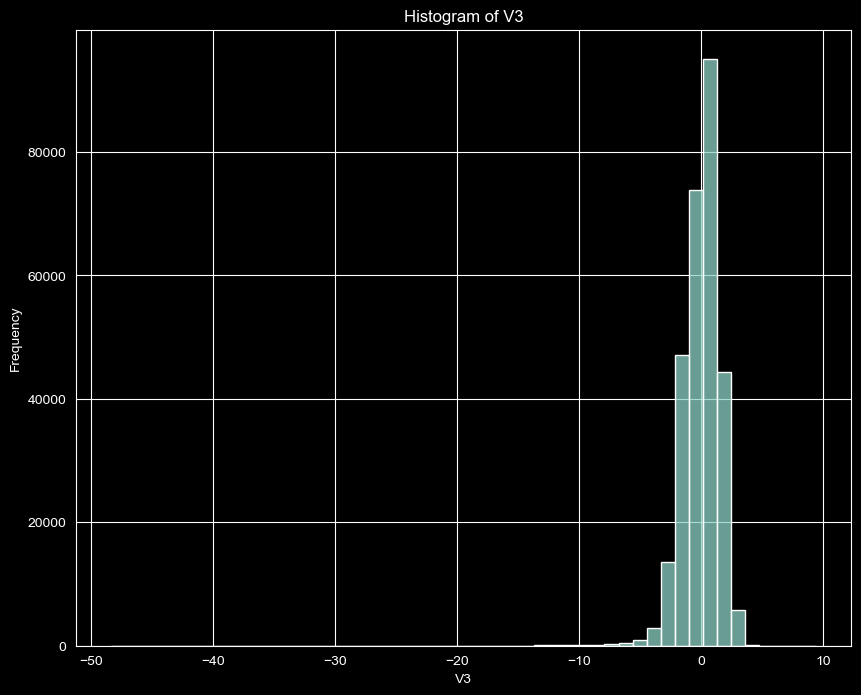


### Univariate Analysis - V3

- Mean: -0.00
- Median: 0.18
- Standard Deviation: 1.52
- Skewness: -2.24 (left-skewed)

**Observation:**
The distribution of **V3** appears left-skewed.
Since this feature is PCA-transformed, its original meaning is not directly interpretable.
However, the spread and shape indicate how transaction patterns vary across this component.

---


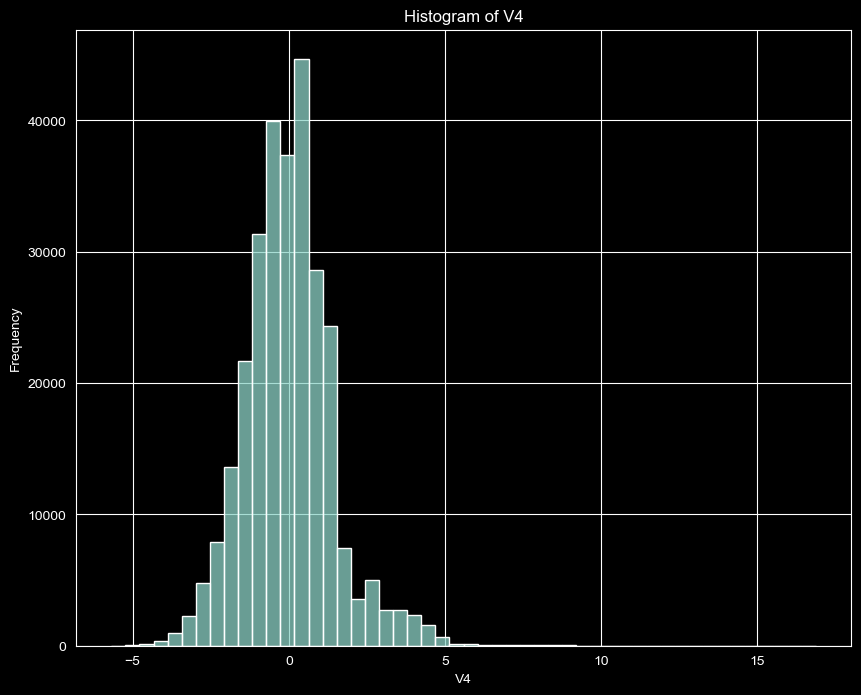


### Univariate Analysis - V4

- Mean: 0.00
- Median: -0.02
- Standard Deviation: 1.42
- Skewness: 0.68 (right-skewed)

**Observation:**
The distribution of **V4** appears right-skewed.
Since this feature is PCA-transformed, its original meaning is not directly interpretable.
However, the spread and shape indicate how transaction patterns vary across this component.

---


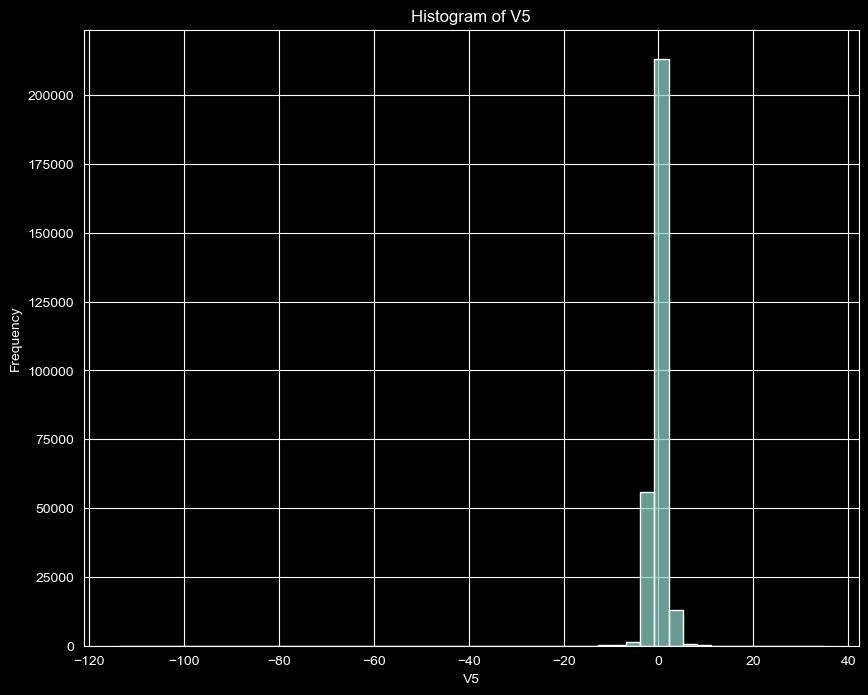


### Univariate Analysis - V5

- Mean: 0.00
- Median: -0.05
- Standard Deviation: 1.38
- Skewness: -2.43 (left-skewed)

**Observation:**
The distribution of **V5** appears left-skewed.
Since this feature is PCA-transformed, its original meaning is not directly interpretable.
However, the spread and shape indicate how transaction patterns vary across this component.

---


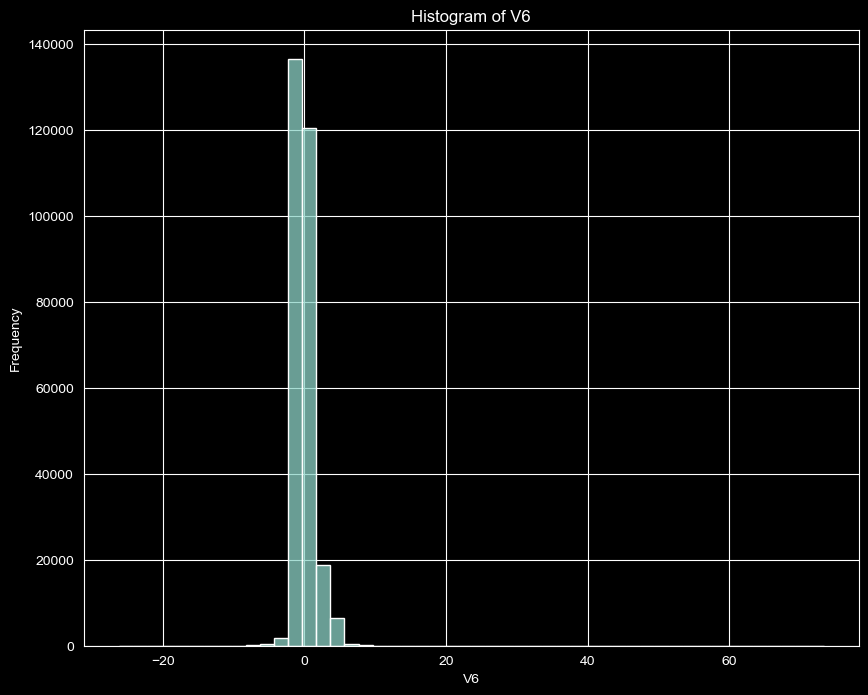


### Univariate Analysis - V6

- Mean: 0.00
- Median: -0.27
- Standard Deviation: 1.33
- Skewness: 1.83 (right-skewed)

**Observation:**
The distribution of **V6** appears right-skewed.
Since this feature is PCA-transformed, its original meaning is not directly interpretable.
However, the spread and shape indicate how transaction patterns vary across this component.

---


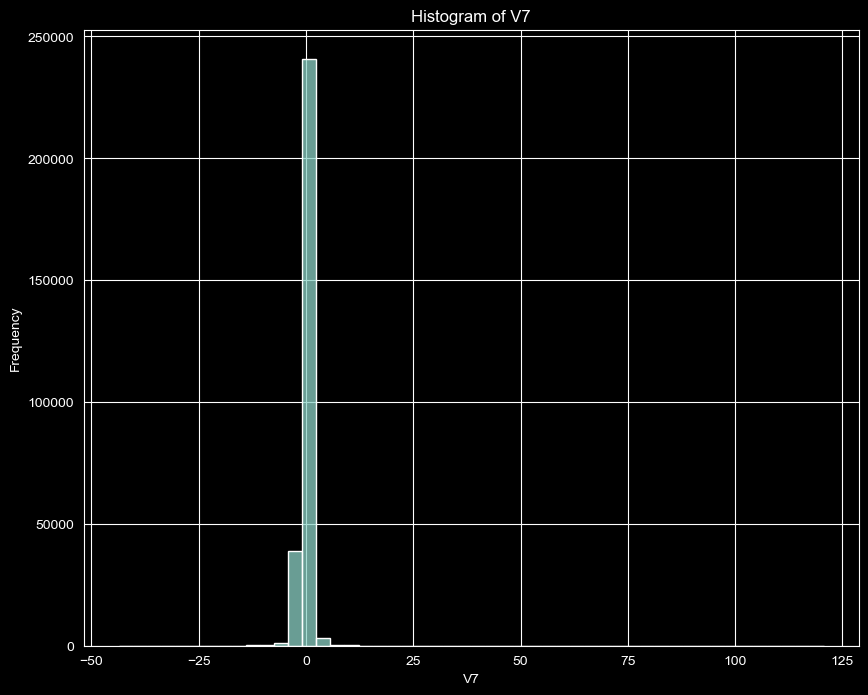


### Univariate Analysis - V7

- Mean: -0.00
- Median: 0.04
- Standard Deviation: 1.24
- Skewness: 2.55 (right-skewed)

**Observation:**
The distribution of **V7** appears right-skewed.
Since this feature is PCA-transformed, its original meaning is not directly interpretable.
However, the spread and shape indicate how transaction patterns vary across this component.

---


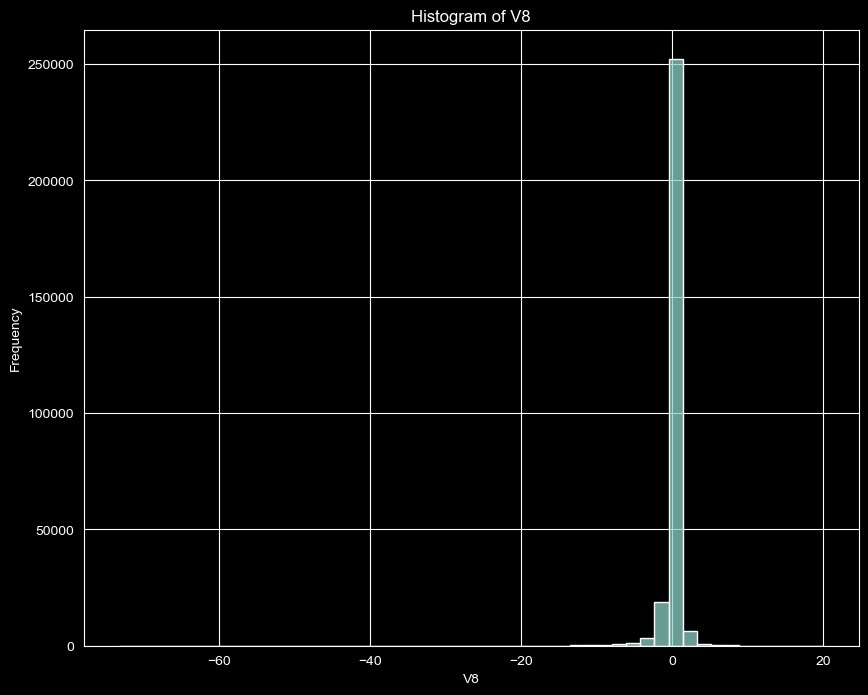


### Univariate Analysis - V8

- Mean: 0.00
- Median: 0.02
- Standard Deviation: 1.19
- Skewness: -8.52 (left-skewed)

**Observation:**
The distribution of **V8** appears left-skewed.
Since this feature is PCA-transformed, its original meaning is not directly interpretable.
However, the spread and shape indicate how transaction patterns vary across this component.

---


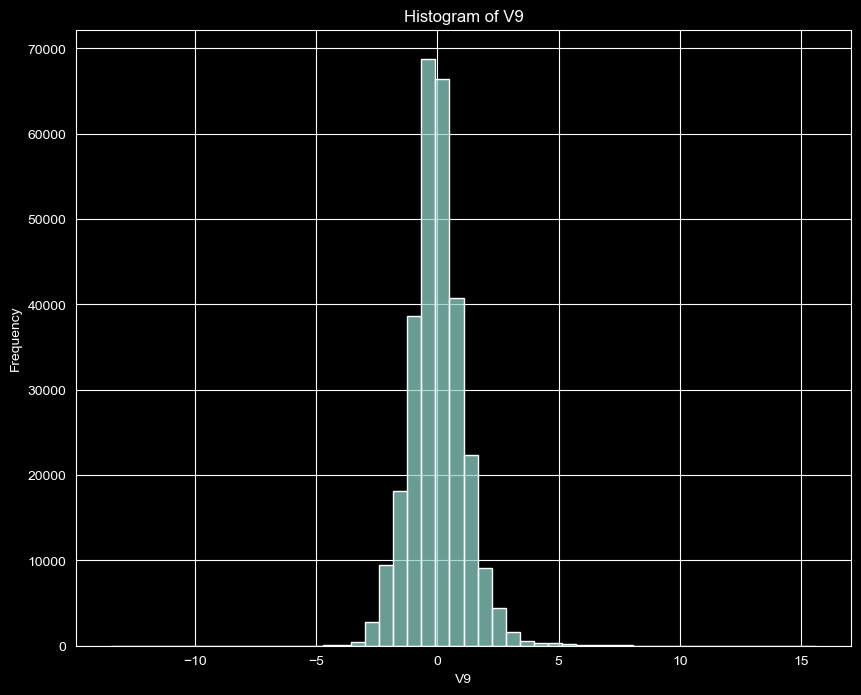


### Univariate Analysis - V9

- Mean: -0.00
- Median: -0.05
- Standard Deviation: 1.10
- Skewness: 0.55 (right-skewed)

**Observation:**
The distribution of **V9** appears right-skewed.
Since this feature is PCA-transformed, its original meaning is not directly interpretable.
However, the spread and shape indicate how transaction patterns vary across this component.

---


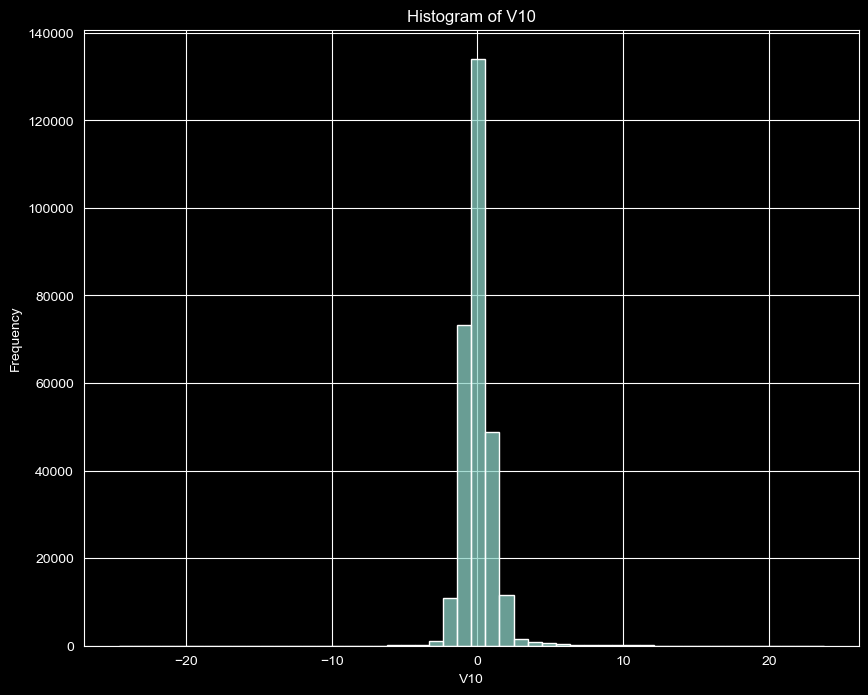


### Univariate Analysis - V10

- Mean: 0.00
- Median: -0.09
- Standard Deviation: 1.09
- Skewness: 1.19 (right-skewed)

**Observation:**
The distribution of **V10** appears right-skewed.
Since this feature is PCA-transformed, its original meaning is not directly interpretable.
However, the spread and shape indicate how transaction patterns vary across this component.

---


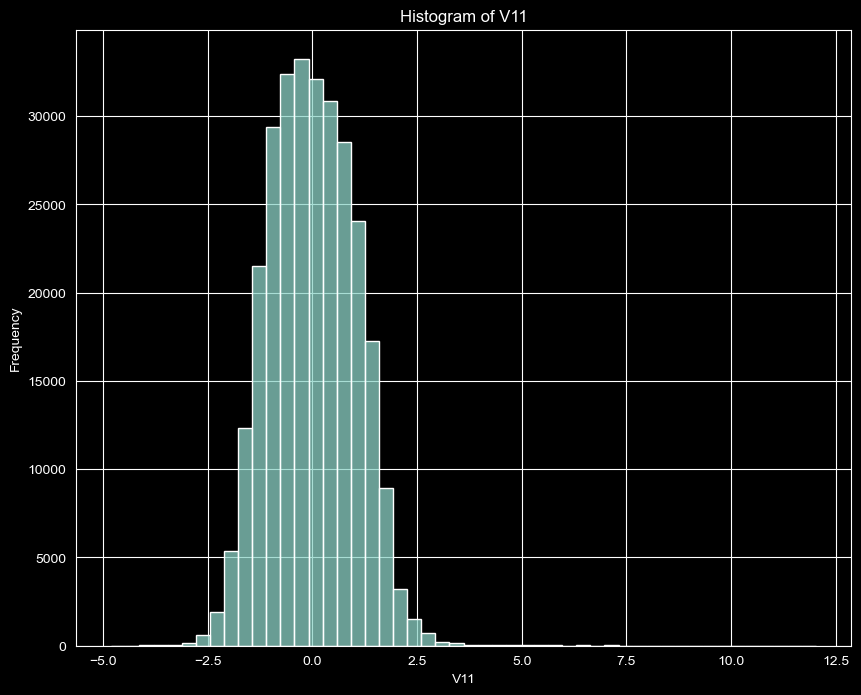


### Univariate Analysis - V11

- Mean: 0.00
- Median: -0.03
- Standard Deviation: 1.02
- Skewness: 0.36 (approximately symmetric)

**Observation:**
The distribution of **V11** appears approximately symmetric.
Since this feature is PCA-transformed, its original meaning is not directly interpretable.
However, the spread and shape indicate how transaction patterns vary across this component.

---


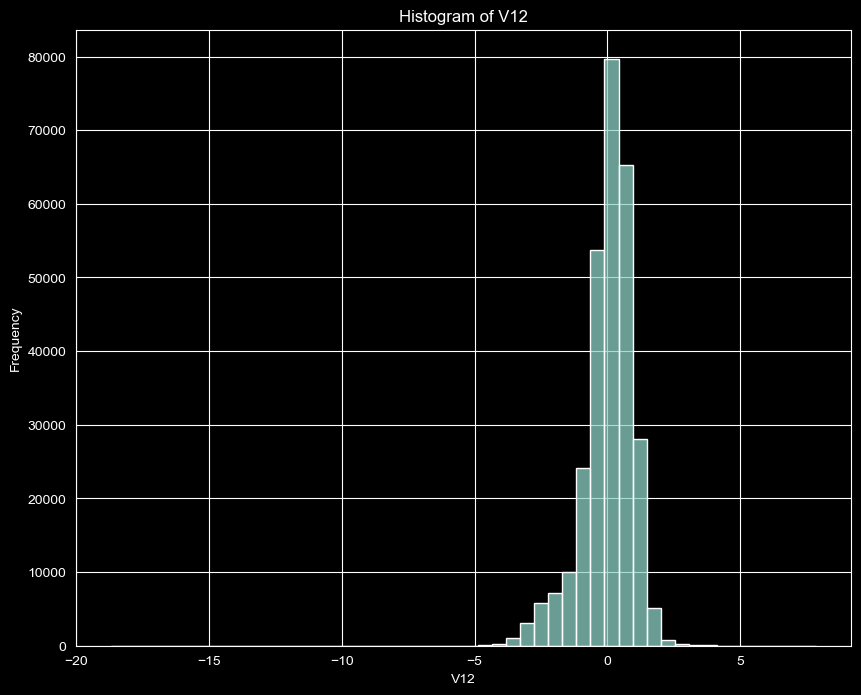


### Univariate Analysis - V12

- Mean: -0.00
- Median: 0.14
- Standard Deviation: 1.00
- Skewness: -2.28 (left-skewed)

**Observation:**
The distribution of **V12** appears left-skewed.
Since this feature is PCA-transformed, its original meaning is not directly interpretable.
However, the spread and shape indicate how transaction patterns vary across this component.

---


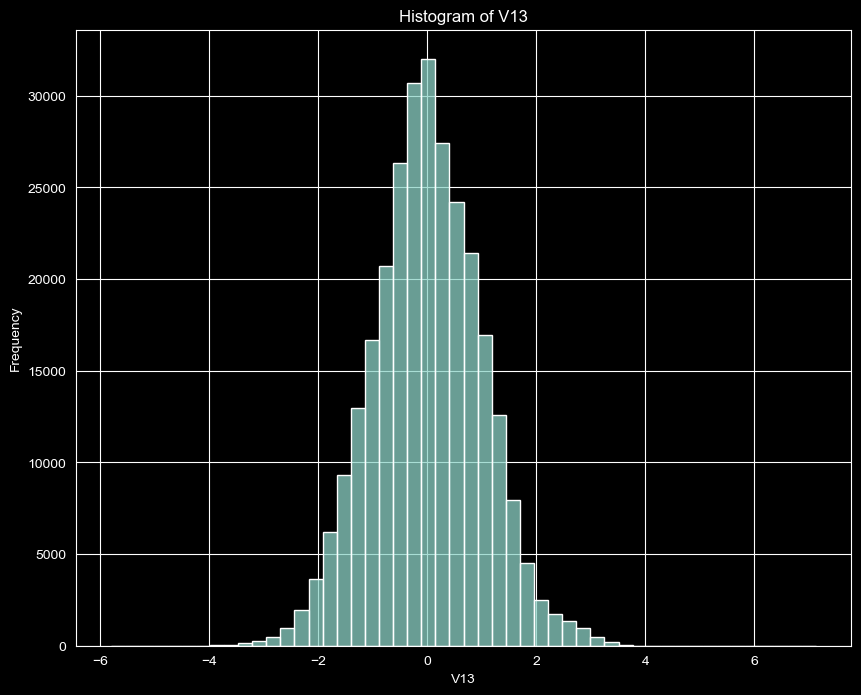


### Univariate Analysis - V13

- Mean: 0.00
- Median: -0.01
- Standard Deviation: 1.00
- Skewness: 0.07 (approximately symmetric)

**Observation:**
The distribution of **V13** appears approximately symmetric.
Since this feature is PCA-transformed, its original meaning is not directly interpretable.
However, the spread and shape indicate how transaction patterns vary across this component.

---


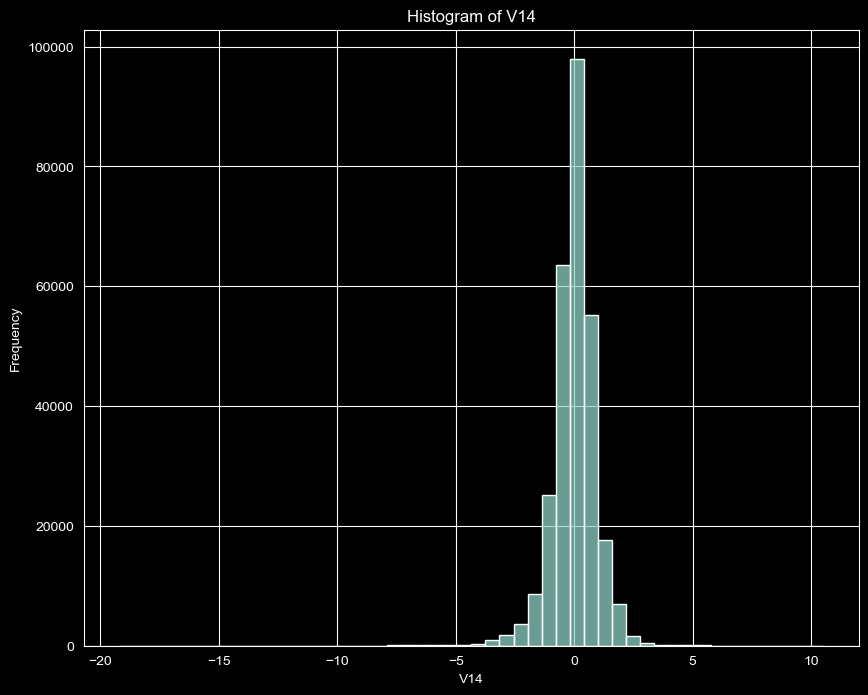


### Univariate Analysis - V14

- Mean: 0.00
- Median: 0.05
- Standard Deviation: 0.96
- Skewness: -2.00 (left-skewed)

**Observation:**
The distribution of **V14** appears left-skewed.
Since this feature is PCA-transformed, its original meaning is not directly interpretable.
However, the spread and shape indicate how transaction patterns vary across this component.

---


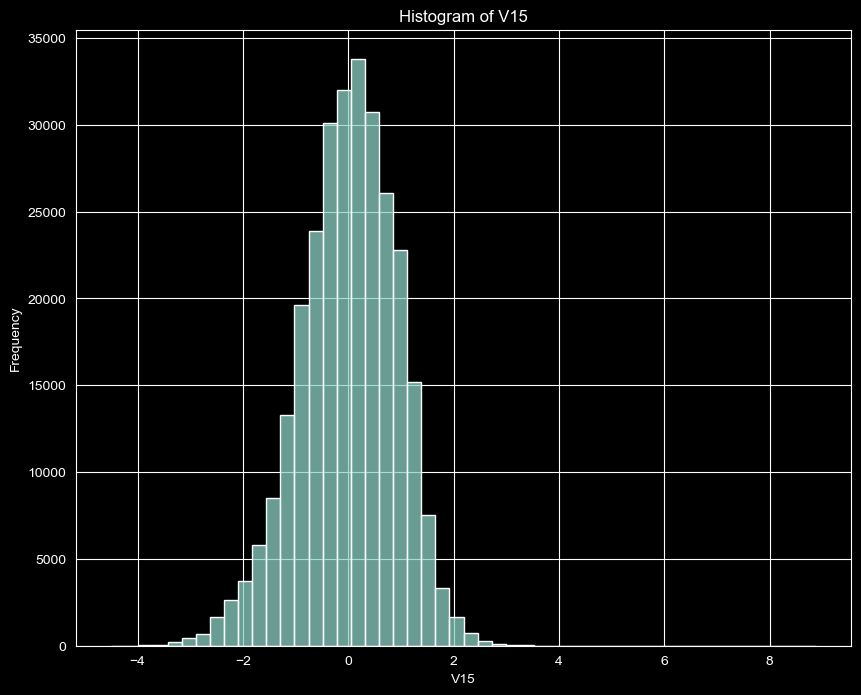


### Univariate Analysis - V15

- Mean: 0.00
- Median: 0.05
- Standard Deviation: 0.92
- Skewness: -0.31 (approximately symmetric)

**Observation:**
The distribution of **V15** appears approximately symmetric.
Since this feature is PCA-transformed, its original meaning is not directly interpretable.
However, the spread and shape indicate how transaction patterns vary across this component.

---


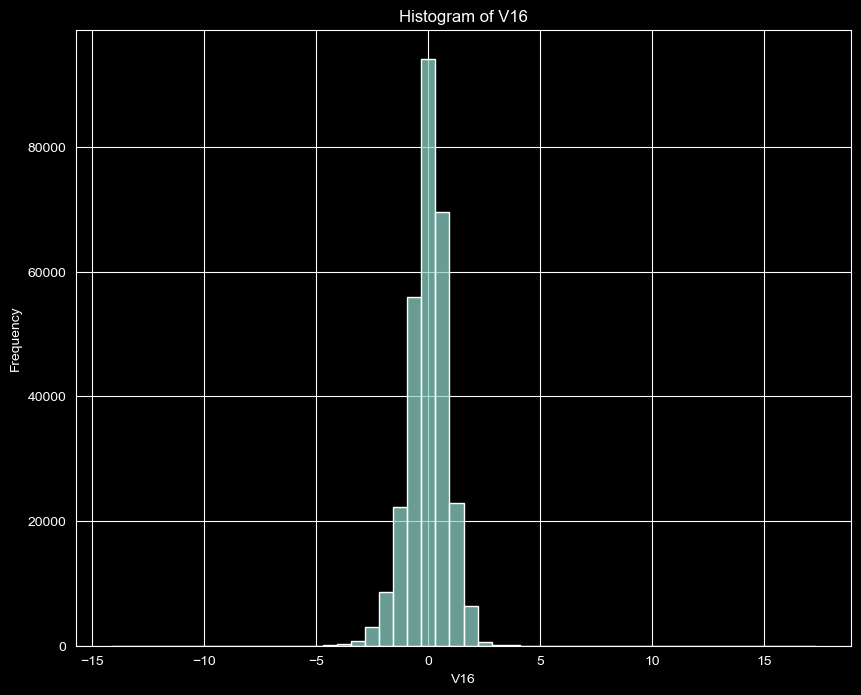


### Univariate Analysis - V16

- Mean: 0.00
- Median: 0.07
- Standard Deviation: 0.88
- Skewness: -1.10 (left-skewed)

**Observation:**
The distribution of **V16** appears left-skewed.
Since this feature is PCA-transformed, its original meaning is not directly interpretable.
However, the spread and shape indicate how transaction patterns vary across this component.

---


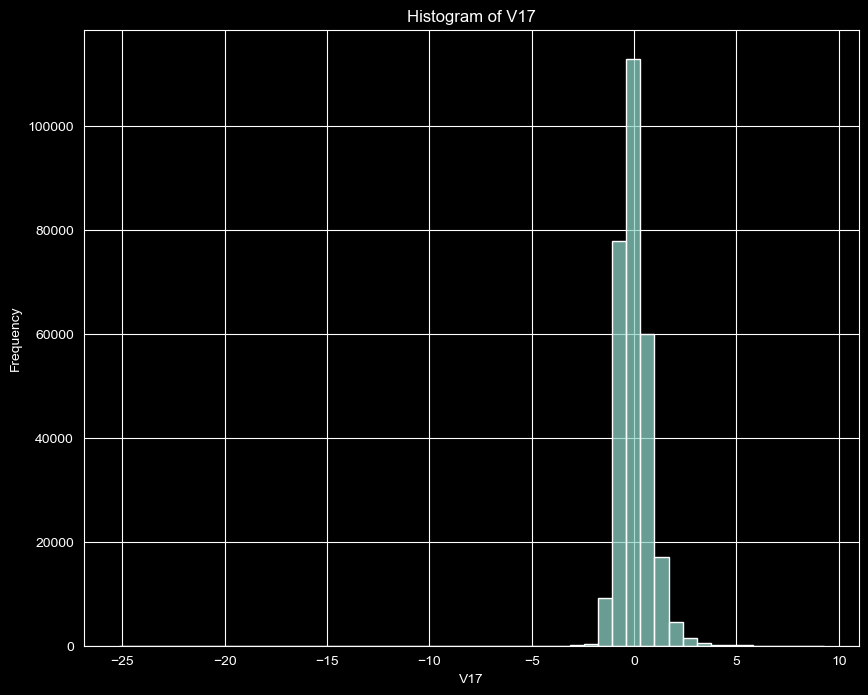


### Univariate Analysis - V17

- Mean: -0.00
- Median: -0.07
- Standard Deviation: 0.85
- Skewness: -3.84 (left-skewed)

**Observation:**
The distribution of **V17** appears left-skewed.
Since this feature is PCA-transformed, its original meaning is not directly interpretable.
However, the spread and shape indicate how transaction patterns vary across this component.

---


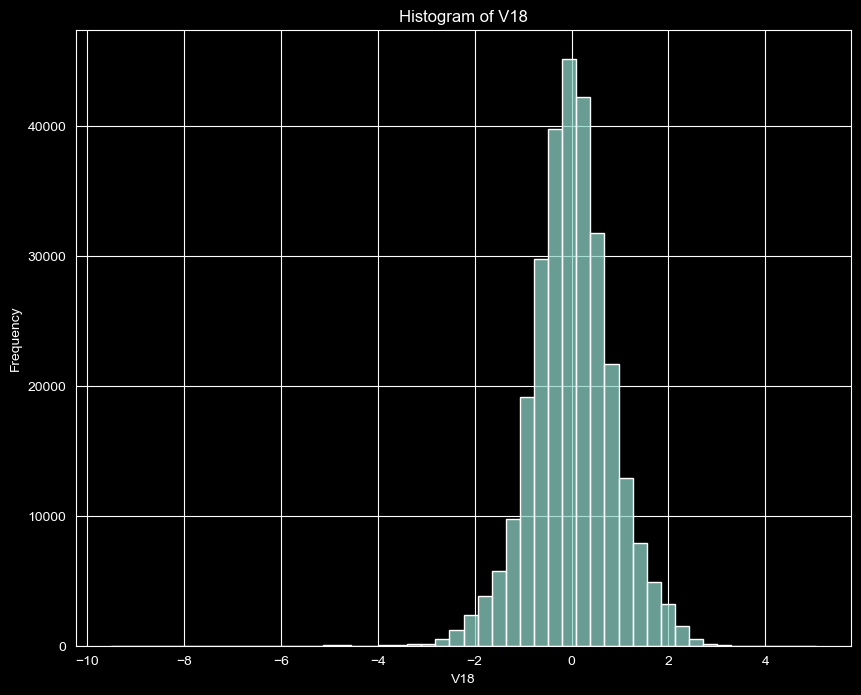


### Univariate Analysis - V18

- Mean: 0.00
- Median: -0.00
- Standard Deviation: 0.84
- Skewness: -0.26 (approximately symmetric)

**Observation:**
The distribution of **V18** appears approximately symmetric.
Since this feature is PCA-transformed, its original meaning is not directly interpretable.
However, the spread and shape indicate how transaction patterns vary across this component.

---


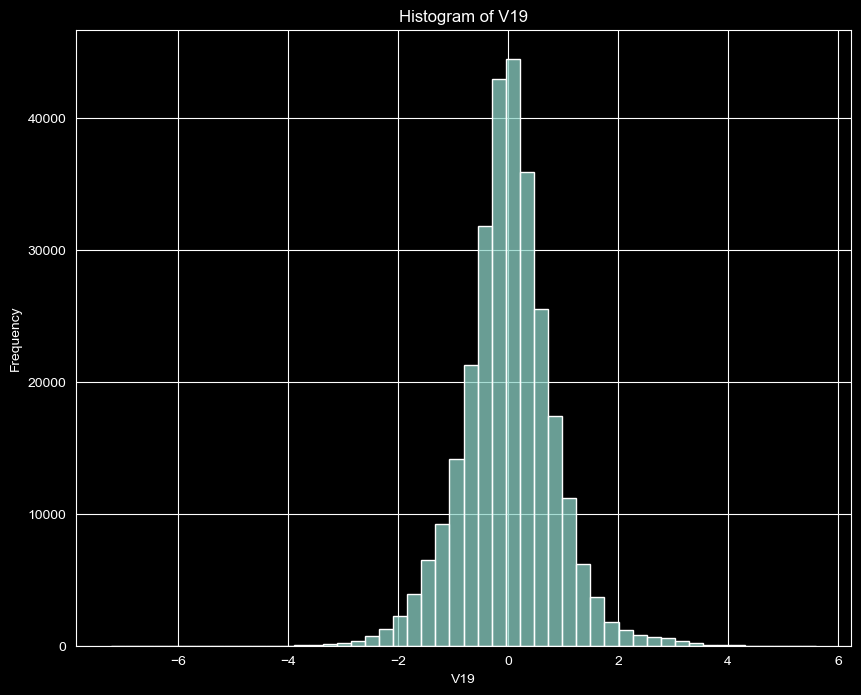


### Univariate Analysis - V19

- Mean: 0.00
- Median: 0.00
- Standard Deviation: 0.81
- Skewness: 0.11 (approximately symmetric)

**Observation:**
The distribution of **V19** appears approximately symmetric.
Since this feature is PCA-transformed, its original meaning is not directly interpretable.
However, the spread and shape indicate how transaction patterns vary across this component.

---


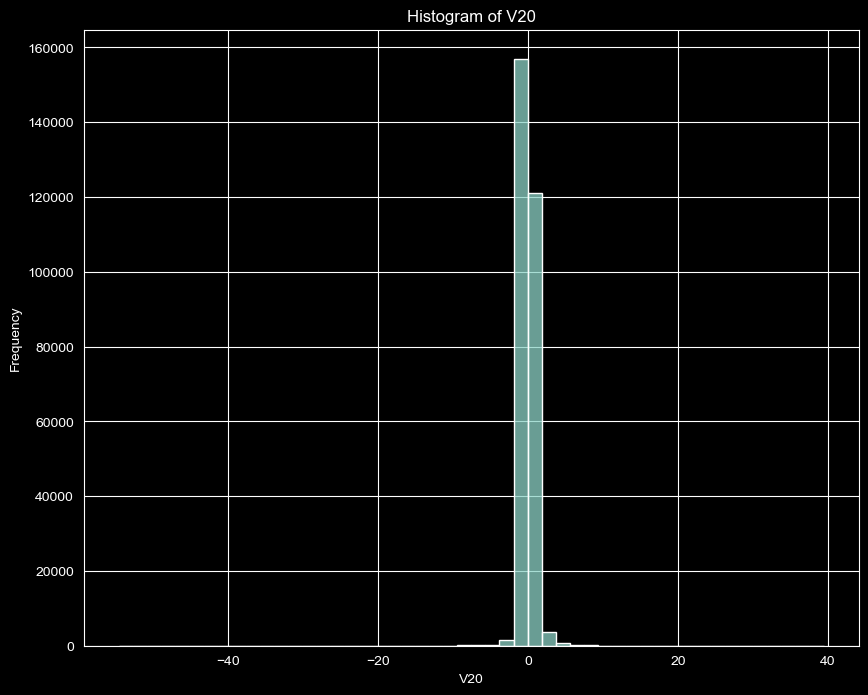


### Univariate Analysis - V20

- Mean: 0.00
- Median: -0.06
- Standard Deviation: 0.77
- Skewness: -2.04 (left-skewed)

**Observation:**
The distribution of **V20** appears left-skewed.
Since this feature is PCA-transformed, its original meaning is not directly interpretable.
However, the spread and shape indicate how transaction patterns vary across this component.

---


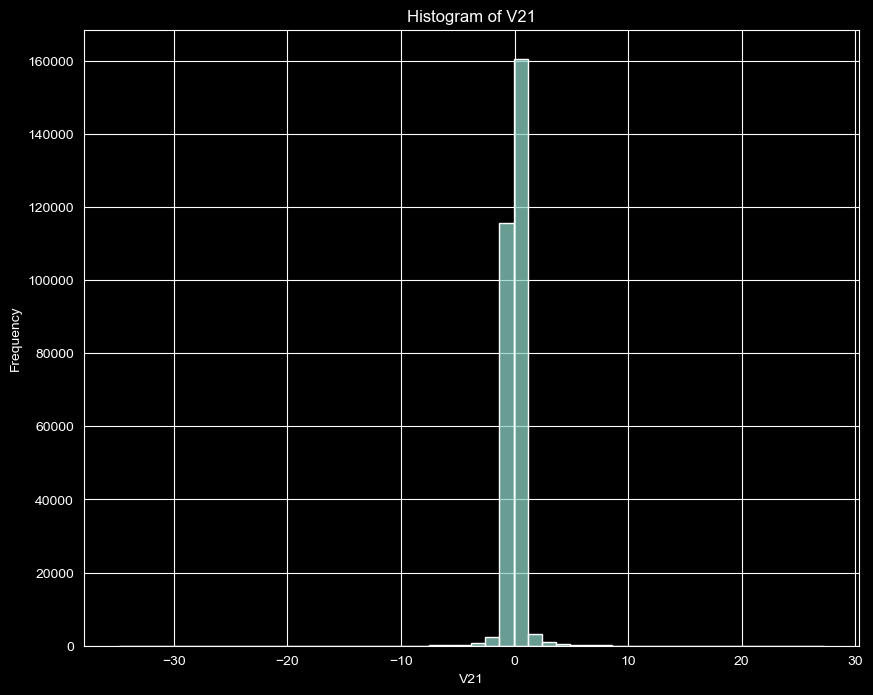


### Univariate Analysis - V21

- Mean: 0.00
- Median: -0.03
- Standard Deviation: 0.73
- Skewness: 3.59 (right-skewed)

**Observation:**
The distribution of **V21** appears right-skewed.
Since this feature is PCA-transformed, its original meaning is not directly interpretable.
However, the spread and shape indicate how transaction patterns vary across this component.

---


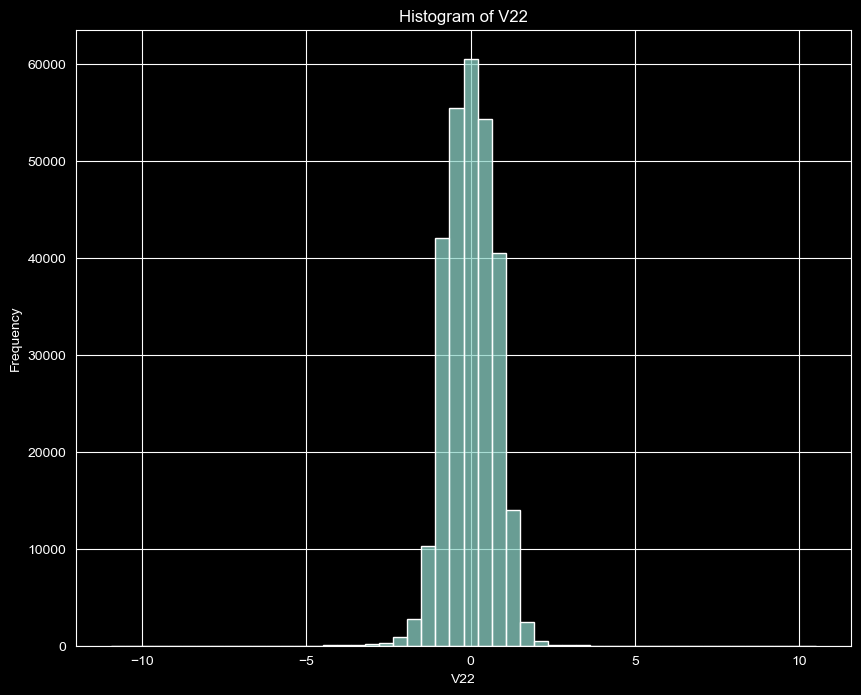


### Univariate Analysis - V22

- Mean: -0.00
- Median: 0.01
- Standard Deviation: 0.73
- Skewness: -0.21 (approximately symmetric)

**Observation:**
The distribution of **V22** appears approximately symmetric.
Since this feature is PCA-transformed, its original meaning is not directly interpretable.
However, the spread and shape indicate how transaction patterns vary across this component.

---


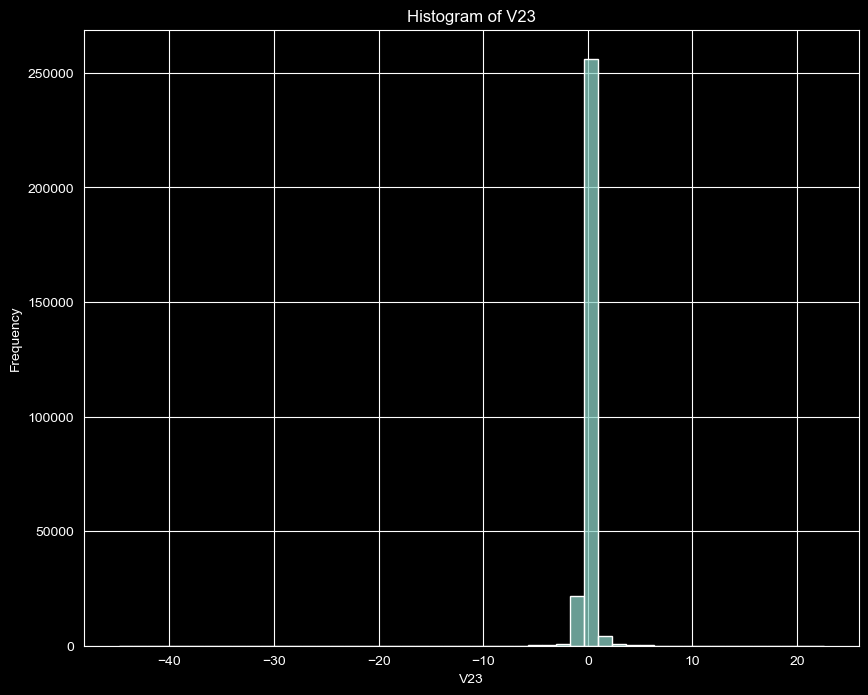


### Univariate Analysis - V23

- Mean: 0.00
- Median: -0.01
- Standard Deviation: 0.62
- Skewness: -5.88 (left-skewed)

**Observation:**
The distribution of **V23** appears left-skewed.
Since this feature is PCA-transformed, its original meaning is not directly interpretable.
However, the spread and shape indicate how transaction patterns vary across this component.

---


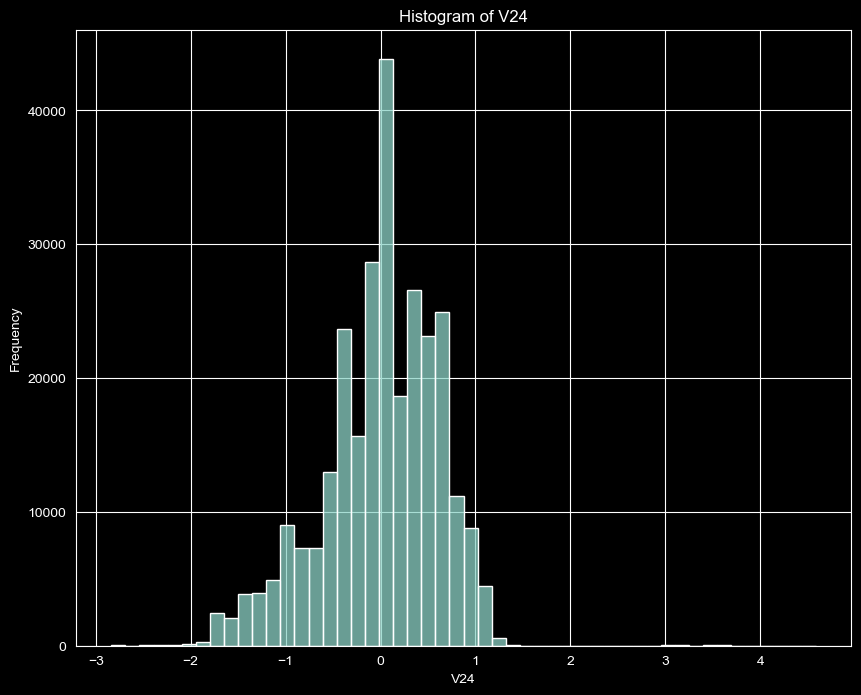


### Univariate Analysis - V24

- Mean: 0.00
- Median: 0.04
- Standard Deviation: 0.61
- Skewness: -0.55 (left-skewed)

**Observation:**
The distribution of **V24** appears left-skewed.
Since this feature is PCA-transformed, its original meaning is not directly interpretable.
However, the spread and shape indicate how transaction patterns vary across this component.

---


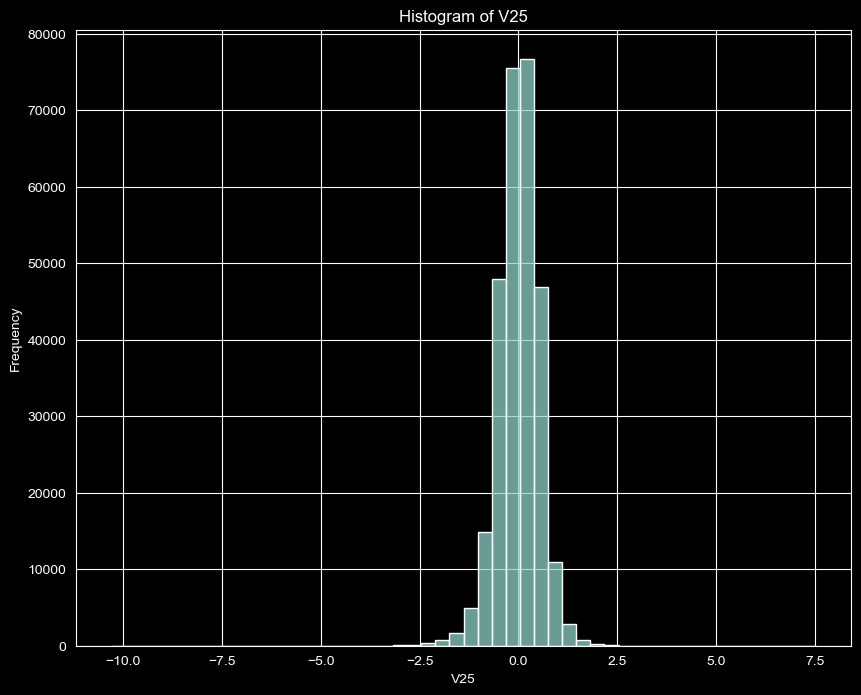


### Univariate Analysis - V25

- Mean: 0.00
- Median: 0.02
- Standard Deviation: 0.52
- Skewness: -0.42 (approximately symmetric)

**Observation:**
The distribution of **V25** appears approximately symmetric.
Since this feature is PCA-transformed, its original meaning is not directly interpretable.
However, the spread and shape indicate how transaction patterns vary across this component.

---


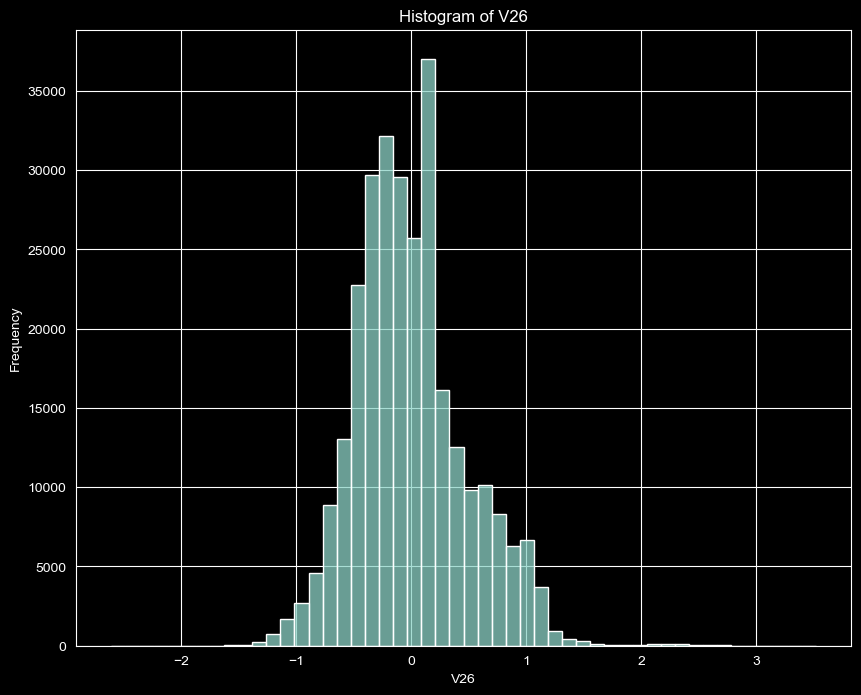


### Univariate Analysis - V26

- Mean: 0.00
- Median: -0.05
- Standard Deviation: 0.48
- Skewness: 0.58 (right-skewed)

**Observation:**
The distribution of **V26** appears right-skewed.
Since this feature is PCA-transformed, its original meaning is not directly interpretable.
However, the spread and shape indicate how transaction patterns vary across this component.

---


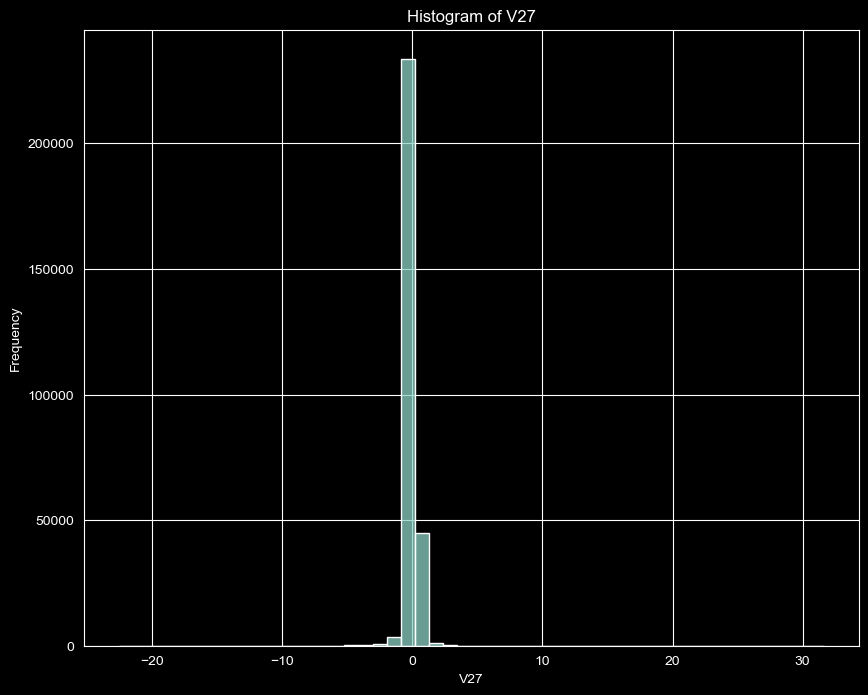


### Univariate Analysis - V27

- Mean: -0.00
- Median: 0.00
- Standard Deviation: 0.40
- Skewness: -1.17 (left-skewed)

**Observation:**
The distribution of **V27** appears left-skewed.
Since this feature is PCA-transformed, its original meaning is not directly interpretable.
However, the spread and shape indicate how transaction patterns vary across this component.

---


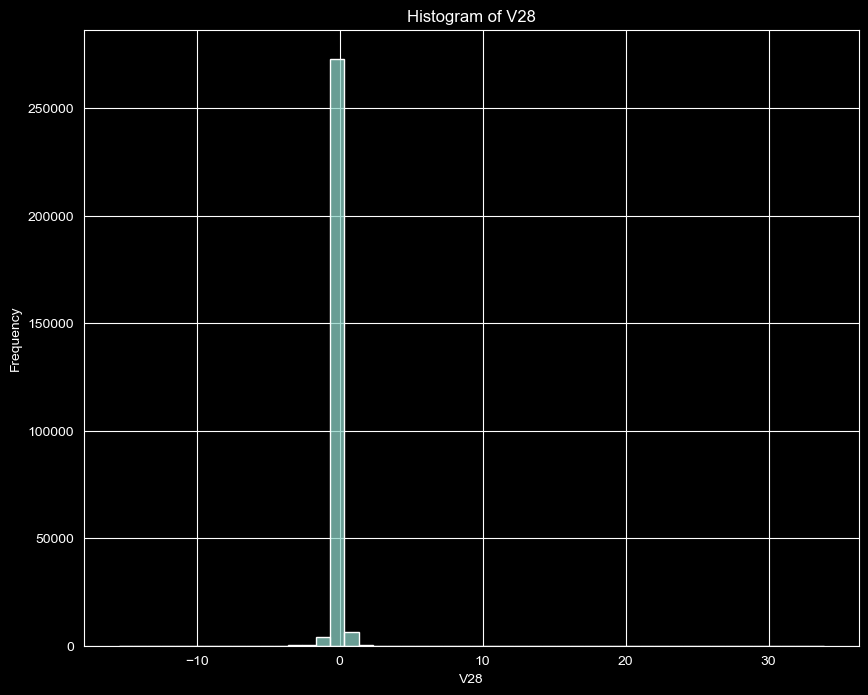


### Univariate Analysis - V28

- Mean: -0.00
- Median: 0.01
- Standard Deviation: 0.33
- Skewness: 11.19 (right-skewed)

**Observation:**
The distribution of **V28** appears right-skewed.
Since this feature is PCA-transformed, its original meaning is not directly interpretable.
However, the spread and shape indicate how transaction patterns vary across this component.

---


In [9]:

from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns

num_cols=df.select_dtypes(include=['int64','float64'])
for cols in num_cols:
    if cols.startswith('V'):
        plt.figure(figsize=(10,8))
        sns.histplot(df[cols], bins=50)
        plt.title(f"Histogram of {cols}")
        plt.xlabel(cols)
        plt.ylabel("Frequency")
        plt.show()

        # basic stats
        mean_val = df[cols].mean()
        median_val = df[cols].median()
        skew_val = df[cols].skew()
        std_val = df[cols].std()

        # skew detection (better logic)
        if skew_val > 0.5:
            skew_text = "right-skewed"
        elif skew_val < -0.5:
            skew_text = "left-skewed"
        else:
            skew_text = "approximately symmetric"

        markdown = f"""
### Univariate Analysis - {cols}

- Mean: {mean_val:.2f}
- Median: {median_val:.2f}
- Standard Deviation: {std_val:.2f}
- Skewness: {skew_val:.2f} ({skew_text})

**Observation:**
The distribution of **{cols}** appears {skew_text}.
Since this feature is PCA-transformed, its original meaning is not directly interpretable.
However, the spread and shape indicate how transaction patterns vary across this component.

---
"""

        display(Markdown(markdown))


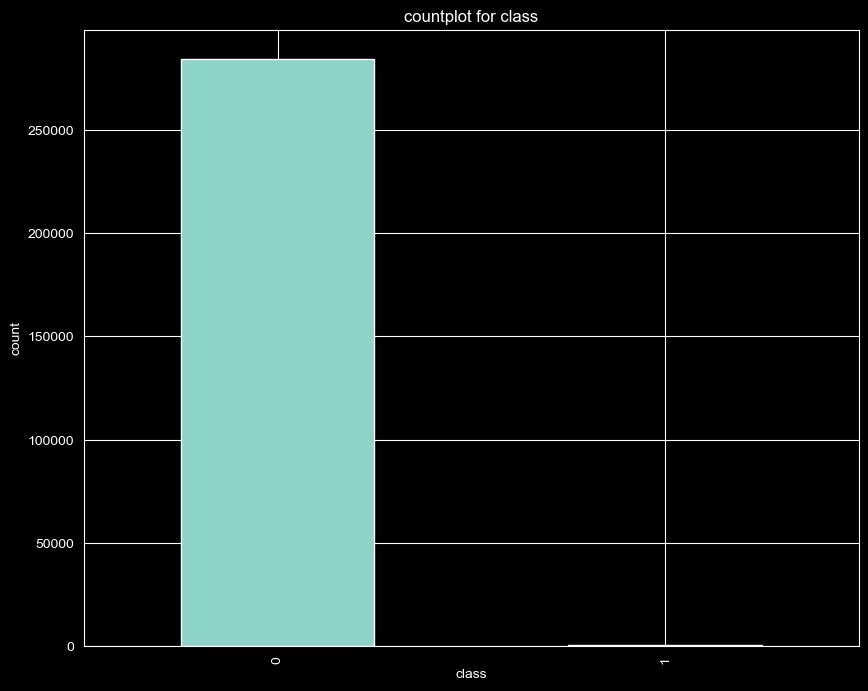

In [10]:
#univariate analysis for target variable which is class
plt.figure(figsize=(10,8))
df['Class'].value_counts().plot(kind='bar')
plt.title('countplot for class')
plt.xlabel('class')
plt.ylabel('count')
plt.show()

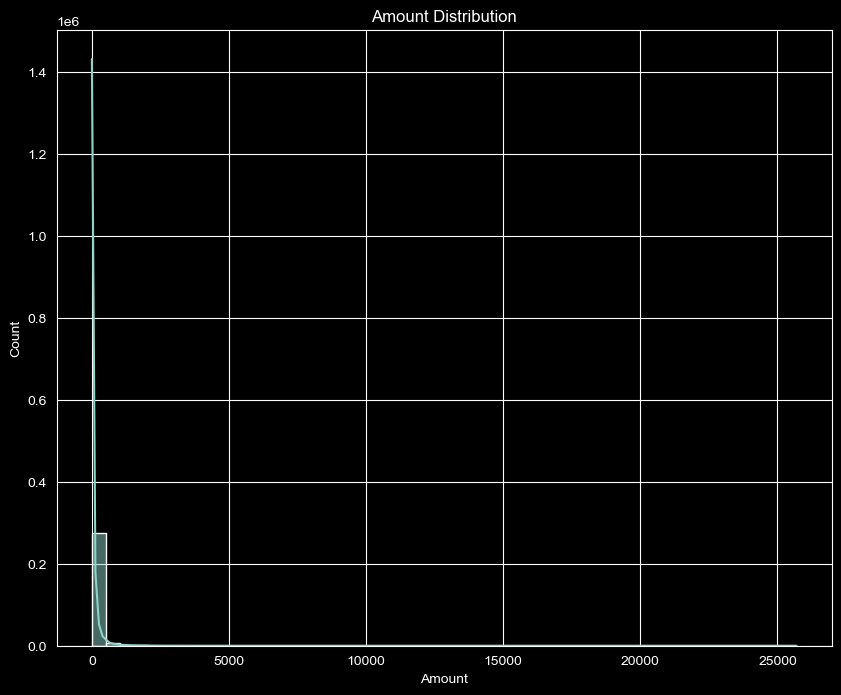


### Univariate Analysis - Amount

- Mean: 88.35
- Median: 22.00
- Standard Deviation: 250.12
- Skewness: 16.98 (right-skewed)

**Observation:**

The **Amount** feature represents the transaction amount.
The distribution is typically right-skewed, indicating that most transactions are small while a few transactions have very large values.
This suggests the presence of outliers and may require scaling before model training.$0.2$ means $0.2 	imes 1,000,000 =$ $200,000$ occurrences. so we can see the kde line is only concentrated at amount=0 so the millions of transactions were centered at small amputns


---


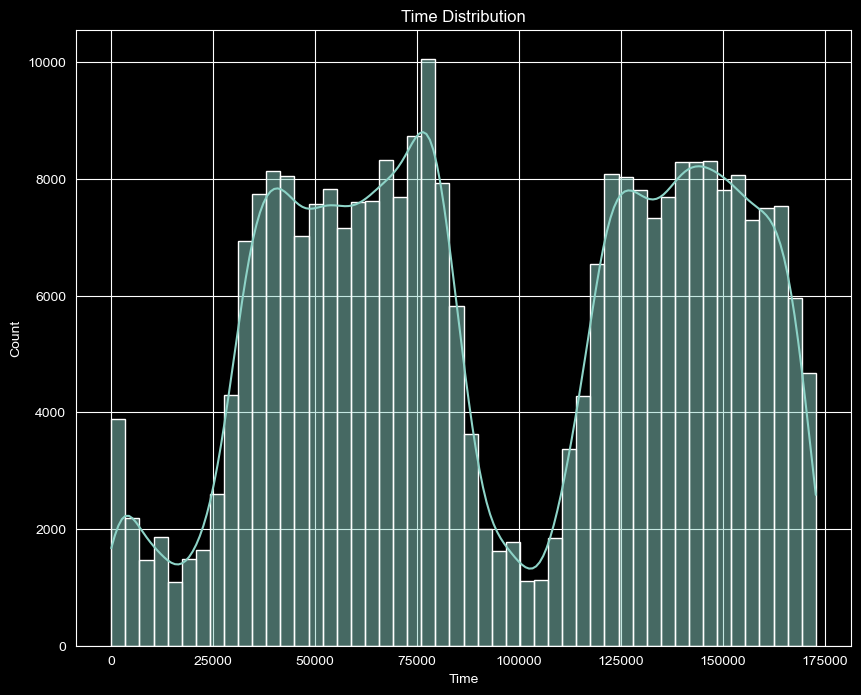


### Univariate Analysis - Time

- Mean: 94813.86
- Median: 84692.00
- Standard Deviation: 47488.15
- Skewness: -0.04 (approximately symmetric)

**Observation:**

The **Time** feature represents the number of seconds elapsed between each transaction and the first transaction in the dataset.
The distribution shows how transactions are spread across the recorded time period (approximately two days).
This feature may help identify temporal fraud patterns.


---


In [11]:
from IPython.display import display, Markdown

column = ['Amount','Time']

for cols in column:
    plt.figure(figsize=(10,8))
    sns.histplot(data=df, x=cols, bins=50, kde=True)
    plt.title(f'{cols} Distribution')
    plt.xlabel(cols)
    plt.show()

    # basic stats
    mean_val = df[cols].mean()
    median_val = df[cols].median()
    skew_val = df[cols].skew()
    std_val = df[cols].std()

    # skew detection
    if skew_val > 0.5:
        skew_text = "right-skewed"
    elif skew_val < -0.5:
        skew_text = "left-skewed"
    else:
        skew_text = "approximately symmetric"

    # different observation for Amount and Time
    if cols == "Amount":
        observation_text = """
The **Amount** feature represents the transaction amount.
The distribution is typically right-skewed, indicating that most transactions are small while a few transactions have very large values.
This suggests the presence of outliers and may require scaling before model training.$0.2$ means $0.2 \times 1,000,000 =$ $200,000$ occurrences. so we can see the kde line is only concentrated at amount=0 so the millions of transactions were centered at small amputns
"""
    else:  # Time
        observation_text = """
The **Time** feature represents the number of seconds elapsed between each transaction and the first transaction in the dataset.
The distribution shows how transactions are spread across the recorded time period (approximately two days).
This feature may help identify temporal fraud patterns.
"""

    markdown = f"""
### Univariate Analysis - {cols}

- Mean: {mean_val:.2f}
- Median: {median_val:.2f}
- Standard Deviation: {std_val:.2f}
- Skewness: {skew_val:.2f} ({skew_text})

**Observation:**
{observation_text}

---
"""

    display(Markdown(markdown))

<Axes: xlabel='Amount'>

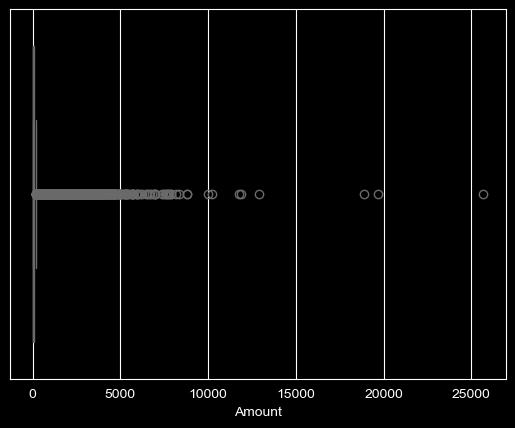

In [12]:
#boxplot for amount
sns.boxplot(data=df,x='Amount')

BIVARAITE ANALYSIS

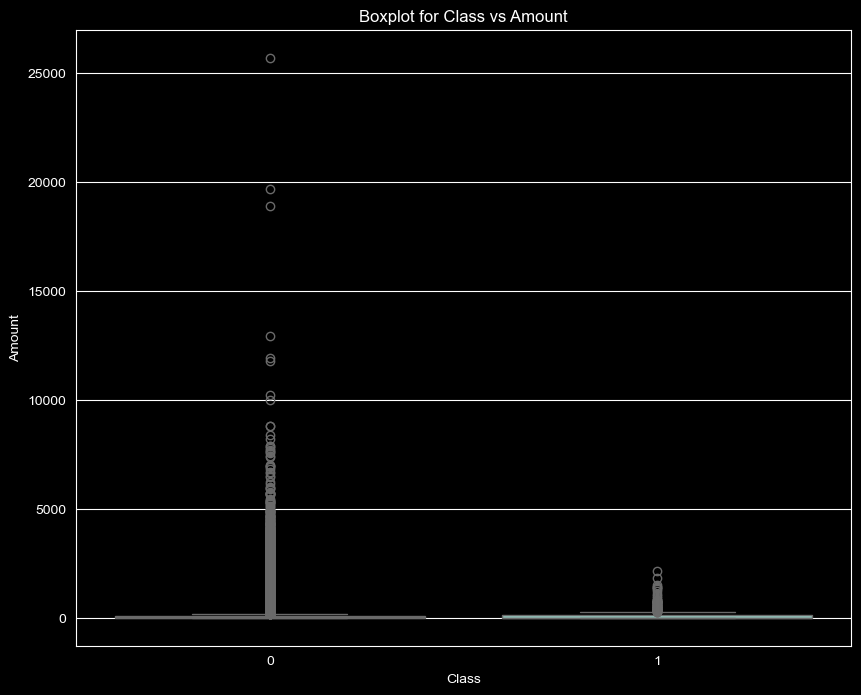


    ### Bivariate Analysis - Class vs Amount

    **Statistics Comparison**

    | Metric | Non-Fraud (Class 0) | Fraud (Class 1) |
    |--------|--------------------|-----------------|
    | Mean | 88.29 | 122.21 |
    | Median | 22.00 | 9.25 |
    | Standard Deviation | 250.11 | 256.68 |

    **Observations**
    - There is no strong separation between fraud and non-fraud distributions.
    - The feature **Amount** shows how transaction behavior differs between fraudulent and normal transactions.

    **Conclusion**
    This feature may contribute to fraud detection when combined with other variables.

    ---
    

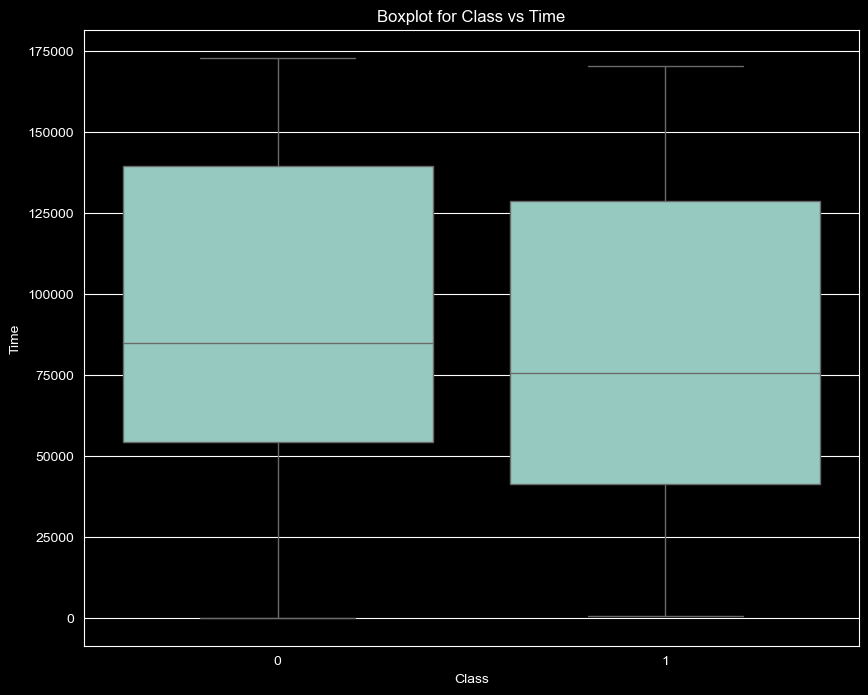


    ### Bivariate Analysis - Class vs Time

    **Statistics Comparison**

    | Metric | Non-Fraud (Class 0) | Fraud (Class 1) |
    |--------|--------------------|-----------------|
    | Mean | 94838.20 | 80746.81 |
    | Median | 84711.00 | 75568.50 |
    | Standard Deviation | 47484.02 | 47835.37 |

    **Observations**
    - There is no strong separation between fraud and non-fraud distributions.
    - The feature **Time** shows how transaction behavior differs between fraudulent and normal transactions.

    **Conclusion**
    This feature may contribute to fraud detection when combined with other variables.

    ---
    

In [13]:
columns=['Amount','Time']
for cols in column:
    plt.figure(figsize=(10,8))
    sns.boxplot(data=df,x='Class',y=cols)
    plt.title(f"Boxplot for Class vs {cols}")
    plt.xlabel('Class')
    plt.ylabel(f'{cols}')
    plt.show()

    #calculations
    #group_stats calculates mean,md,std for each 0 and 1 section present in class for amount and time
    group_stats=df.groupby('Class')[cols].agg(['mean', 'median', 'std', 'skew'])

    #extracting mean,md,stda nd all
    mean_0=group_stats.loc[0,'mean']
    mean_1=group_stats.loc[1,'mean'] if 1 in group_stats.index else 0

    median_0=group_stats.loc[0,'median']
    median_1=group_stats.loc[1,'median'] if 1 in group_stats.index else 0

    std_0=group_stats.loc[0,'std']
    std_1=group_stats.loc[1,'std'] if 1 in group_stats.index else 0

    skew_0=group_stats.loc[0,'skew']
    skew_1=group_stats.loc[1,'skew'] if 1 in group_stats.index else 0

    if abs(mean_1-mean_0)>std_0:
        pattern_text = "There is a noticeable difference between fraud and non-fraud distributions."
    else:
         pattern_text = "There is no strong separation between fraud and non-fraud distributions."
    markdown = f"""
    ### Bivariate Analysis - Class vs {cols}

    **Statistics Comparison**

    | Metric | Non-Fraud (Class 0) | Fraud (Class 1) |
    |--------|--------------------|-----------------|
    | Mean | {mean_0:.2f} | {mean_1:.2f} |
    | Median | {median_0:.2f} | {median_1:.2f} |
    | Standard Deviation | {std_0:.2f} | {std_1:.2f} |

    **Observations**
    - {pattern_text}
    - The feature **{cols}** shows how transaction behavior differs between fraudulent and normal transactions.

    **Conclusion**
    This feature may contribute to fraud detection when combined with other variables.

    ---
    """
    display(Markdown(markdown))

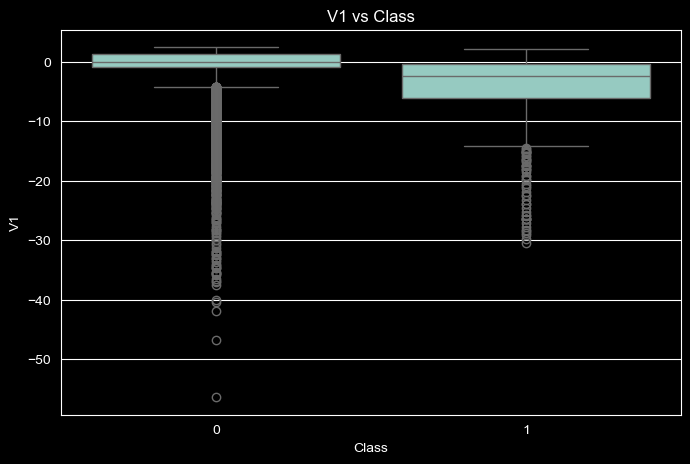


### Bivariate Analysis - V1 vs Class

**Statistics Comparison**

| Metric | Non-Fraud (Class 0) | Fraud (Class 1) |
|--------|--------------------|-----------------|
| Mean | 0.008 | -4.772 |
| Median | 0.020 | -2.342 |
| Standard Deviation | 1.930 | 6.784 |

**Observations**
- The feature **V1** is a PCA-transformed component, so its original meaning is not directly interpretable.
- The difference in distributions between fraud and non-fraud appears **strong**.
- This feature shows clear distribution differences between fraud and non-fraud transactions.

**Conclusion**
This feature may be useful for fraud detection when combined with other variables.

---


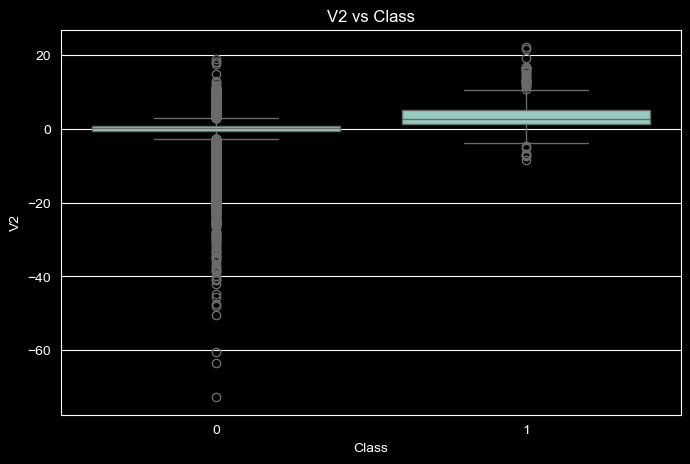


### Bivariate Analysis - V2 vs Class

**Statistics Comparison**

| Metric | Non-Fraud (Class 0) | Fraud (Class 1) |
|--------|--------------------|-----------------|
| Mean | -0.006 | 3.624 |
| Median | 0.064 | 2.718 |
| Standard Deviation | 1.636 | 4.291 |

**Observations**
- The feature **V2** is a PCA-transformed component, so its original meaning is not directly interpretable.
- The difference in distributions between fraud and non-fraud appears **strong**.
- This feature shows clear distribution differences between fraud and non-fraud transactions.

**Conclusion**
This feature may be useful for fraud detection when combined with other variables.

---


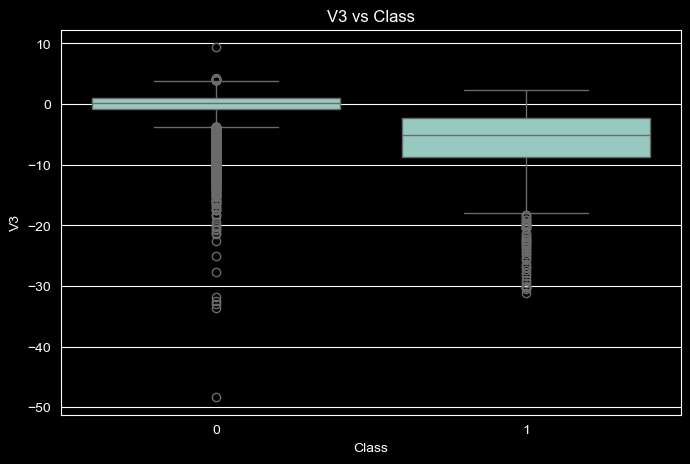


### Bivariate Analysis - V3 vs Class

**Statistics Comparison**

| Metric | Non-Fraud (Class 0) | Fraud (Class 1) |
|--------|--------------------|-----------------|
| Mean | 0.012 | -7.033 |
| Median | 0.182 | -5.075 |
| Standard Deviation | 1.459 | 7.111 |

**Observations**
- The feature **V3** is a PCA-transformed component, so its original meaning is not directly interpretable.
- The difference in distributions between fraud and non-fraud appears **strong**.
- This feature shows clear distribution differences between fraud and non-fraud transactions.

**Conclusion**
This feature may be useful for fraud detection when combined with other variables.

---


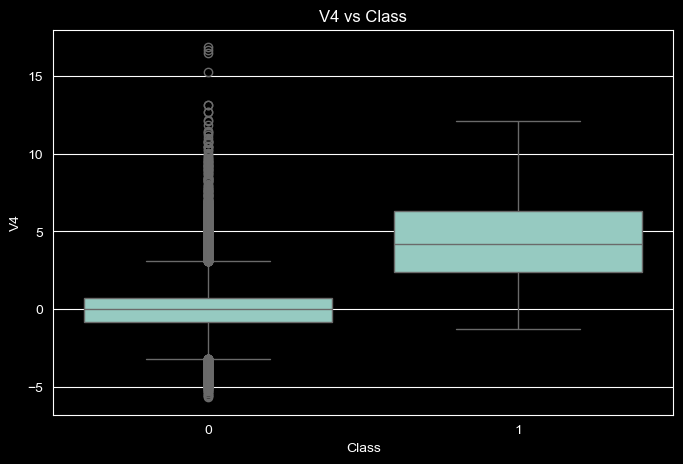


### Bivariate Analysis - V4 vs Class

**Statistics Comparison**

| Metric | Non-Fraud (Class 0) | Fraud (Class 1) |
|--------|--------------------|-----------------|
| Mean | -0.008 | 4.542 |
| Median | -0.022 | 4.177 |
| Standard Deviation | 1.399 | 2.873 |

**Observations**
- The feature **V4** is a PCA-transformed component, so its original meaning is not directly interpretable.
- The difference in distributions between fraud and non-fraud appears **strong**.
- This feature shows clear distribution differences between fraud and non-fraud transactions.

**Conclusion**
This feature may be useful for fraud detection when combined with other variables.

---


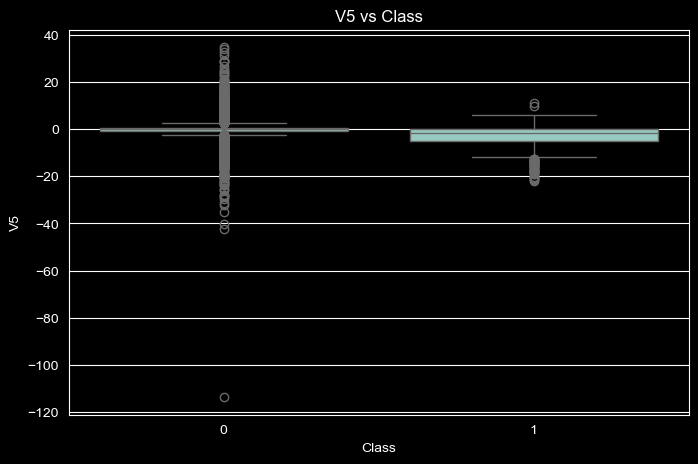


### Bivariate Analysis - V5 vs Class

**Statistics Comparison**

| Metric | Non-Fraud (Class 0) | Fraud (Class 1) |
|--------|--------------------|-----------------|
| Mean | 0.005 | -3.151 |
| Median | -0.053 | -1.523 |
| Standard Deviation | 1.357 | 5.372 |

**Observations**
- The feature **V5** is a PCA-transformed component, so its original meaning is not directly interpretable.
- The difference in distributions between fraud and non-fraud appears **moderate**.
- This feature shows some separation between fraud and non-fraud transactions.

**Conclusion**
This feature may be useful for fraud detection when combined with other variables.

---


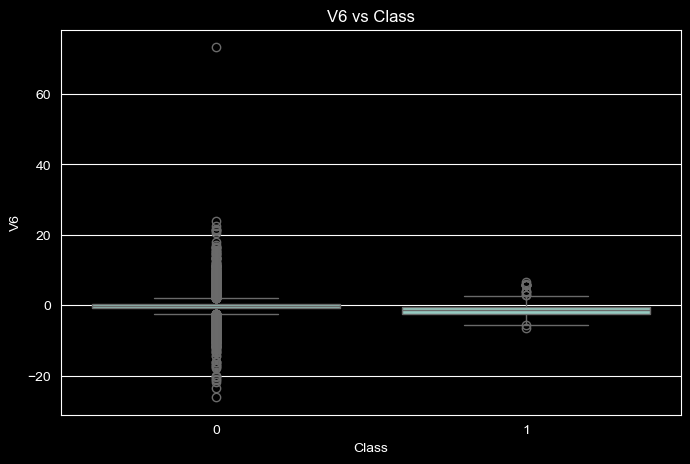


### Bivariate Analysis - V6 vs Class

**Statistics Comparison**

| Metric | Non-Fraud (Class 0) | Fraud (Class 1) |
|--------|--------------------|-----------------|
| Mean | 0.002 | -1.398 |
| Median | -0.273 | -1.425 |
| Standard Deviation | 1.330 | 1.858 |

**Observations**
- The feature **V6** is a PCA-transformed component, so its original meaning is not directly interpretable.
- The difference in distributions between fraud and non-fraud appears **moderate**.
- This feature shows some separation between fraud and non-fraud transactions.

**Conclusion**
This feature may be useful for fraud detection when combined with other variables.

---


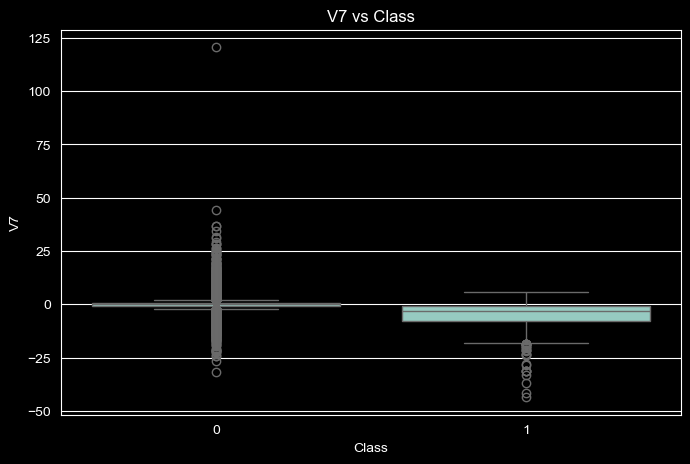


### Bivariate Analysis - V7 vs Class

**Statistics Comparison**

| Metric | Non-Fraud (Class 0) | Fraud (Class 1) |
|--------|--------------------|-----------------|
| Mean | 0.010 | -5.569 |
| Median | 0.041 | -3.034 |
| Standard Deviation | 1.179 | 7.207 |

**Observations**
- The feature **V7** is a PCA-transformed component, so its original meaning is not directly interpretable.
- The difference in distributions between fraud and non-fraud appears **strong**.
- This feature shows clear distribution differences between fraud and non-fraud transactions.

**Conclusion**
This feature may be useful for fraud detection when combined with other variables.

---


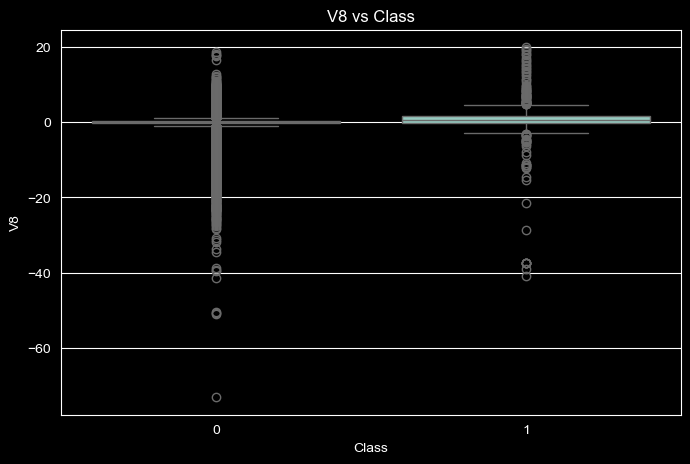


### Bivariate Analysis - V8 vs Class

**Statistics Comparison**

| Metric | Non-Fraud (Class 0) | Fraud (Class 1) |
|--------|--------------------|-----------------|
| Mean | -0.001 | 0.571 |
| Median | 0.022 | 0.622 |
| Standard Deviation | 1.161 | 6.798 |

**Observations**
- The feature **V8** is a PCA-transformed component, so its original meaning is not directly interpretable.
- The difference in distributions between fraud and non-fraud appears **weak**.
- This feature does not strongly separate fraud and non-fraud transactions.

**Conclusion**
This feature may have limited usefulness for fraud detection when combined with other variables.

---


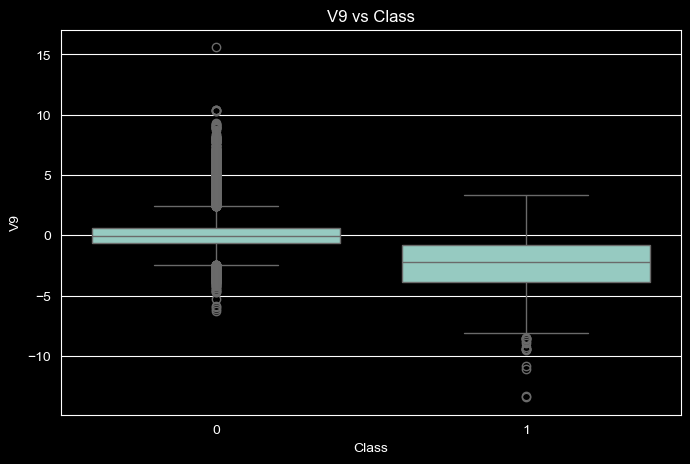


### Bivariate Analysis - V9 vs Class

**Statistics Comparison**

| Metric | Non-Fraud (Class 0) | Fraud (Class 1) |
|--------|--------------------|-----------------|
| Mean | 0.004 | -2.581 |
| Median | -0.050 | -2.209 |
| Standard Deviation | 1.089 | 2.501 |

**Observations**
- The feature **V9** is a PCA-transformed component, so its original meaning is not directly interpretable.
- The difference in distributions between fraud and non-fraud appears **strong**.
- This feature shows clear distribution differences between fraud and non-fraud transactions.

**Conclusion**
This feature may be useful for fraud detection when combined with other variables.

---


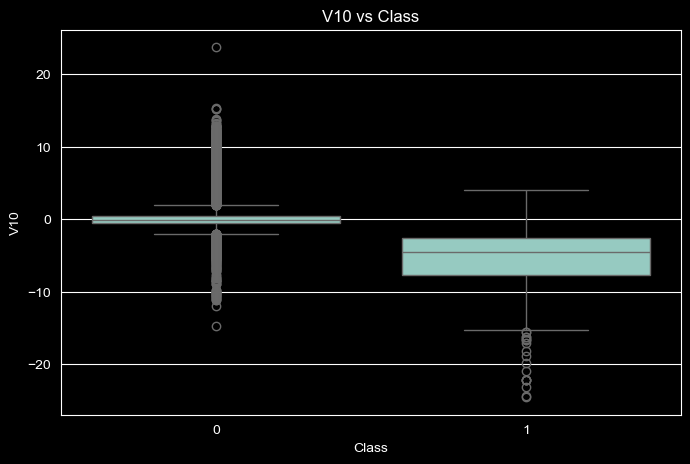


### Bivariate Analysis - V10 vs Class

**Statistics Comparison**

| Metric | Non-Fraud (Class 0) | Fraud (Class 1) |
|--------|--------------------|-----------------|
| Mean | 0.010 | -5.677 |
| Median | -0.092 | -4.579 |
| Standard Deviation | 1.044 | 4.897 |

**Observations**
- The feature **V10** is a PCA-transformed component, so its original meaning is not directly interpretable.
- The difference in distributions between fraud and non-fraud appears **strong**.
- This feature shows clear distribution differences between fraud and non-fraud transactions.

**Conclusion**
This feature may be useful for fraud detection when combined with other variables.

---


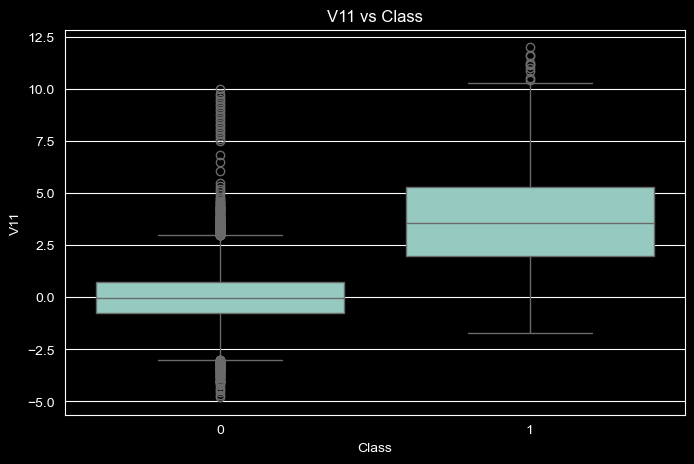


### Bivariate Analysis - V11 vs Class

**Statistics Comparison**

| Metric | Non-Fraud (Class 0) | Fraud (Class 1) |
|--------|--------------------|-----------------|
| Mean | -0.007 | 3.800 |
| Median | -0.035 | 3.586 |
| Standard Deviation | 1.003 | 2.679 |

**Observations**
- The feature **V11** is a PCA-transformed component, so its original meaning is not directly interpretable.
- The difference in distributions between fraud and non-fraud appears **strong**.
- This feature shows clear distribution differences between fraud and non-fraud transactions.

**Conclusion**
This feature may be useful for fraud detection when combined with other variables.

---


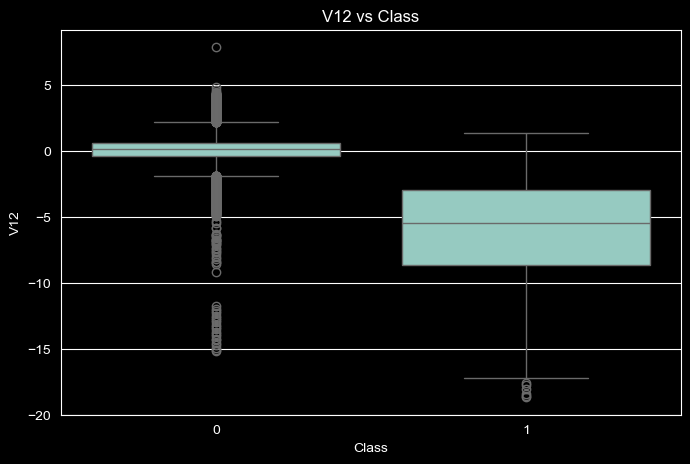


### Bivariate Analysis - V12 vs Class

**Statistics Comparison**

| Metric | Non-Fraud (Class 0) | Fraud (Class 1) |
|--------|--------------------|-----------------|
| Mean | 0.011 | -6.259 |
| Median | 0.142 | -5.503 |
| Standard Deviation | 0.946 | 4.654 |

**Observations**
- The feature **V12** is a PCA-transformed component, so its original meaning is not directly interpretable.
- The difference in distributions between fraud and non-fraud appears **strong**.
- This feature shows clear distribution differences between fraud and non-fraud transactions.

**Conclusion**
This feature may be useful for fraud detection when combined with other variables.

---


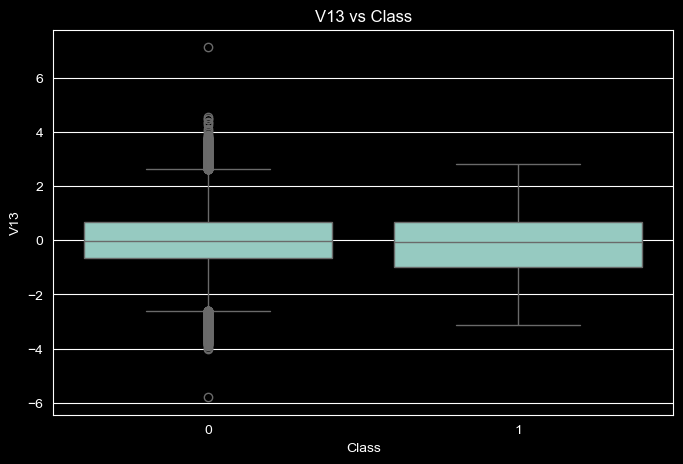


### Bivariate Analysis - V13 vs Class

**Statistics Comparison**

| Metric | Non-Fraud (Class 0) | Fraud (Class 1) |
|--------|--------------------|-----------------|
| Mean | 0.000 | -0.109 |
| Median | -0.014 | -0.066 |
| Standard Deviation | 0.995 | 1.105 |

**Observations**
- The feature **V13** is a PCA-transformed component, so its original meaning is not directly interpretable.
- The difference in distributions between fraud and non-fraud appears **weak**.
- This feature does not strongly separate fraud and non-fraud transactions.

**Conclusion**
This feature may have limited usefulness for fraud detection when combined with other variables.

---


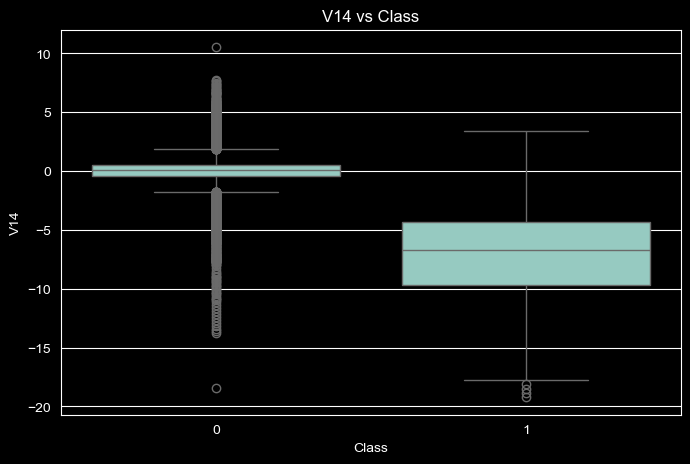


### Bivariate Analysis - V14 vs Class

**Statistics Comparison**

| Metric | Non-Fraud (Class 0) | Fraud (Class 1) |
|--------|--------------------|-----------------|
| Mean | 0.012 | -6.972 |
| Median | 0.052 | -6.730 |
| Standard Deviation | 0.897 | 4.279 |

**Observations**
- The feature **V14** is a PCA-transformed component, so its original meaning is not directly interpretable.
- The difference in distributions between fraud and non-fraud appears **strong**.
- This feature shows clear distribution differences between fraud and non-fraud transactions.

**Conclusion**
This feature may be useful for fraud detection when combined with other variables.

---


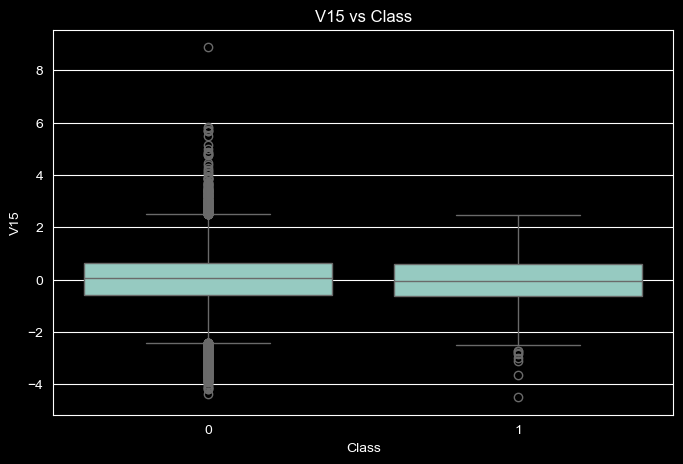


### Bivariate Analysis - V15 vs Class

**Statistics Comparison**

| Metric | Non-Fraud (Class 0) | Fraud (Class 1) |
|--------|--------------------|-----------------|
| Mean | 0.000 | -0.093 |
| Median | 0.048 | -0.057 |
| Standard Deviation | 0.915 | 1.050 |

**Observations**
- The feature **V15** is a PCA-transformed component, so its original meaning is not directly interpretable.
- The difference in distributions between fraud and non-fraud appears **weak**.
- This feature does not strongly separate fraud and non-fraud transactions.

**Conclusion**
This feature may have limited usefulness for fraud detection when combined with other variables.

---


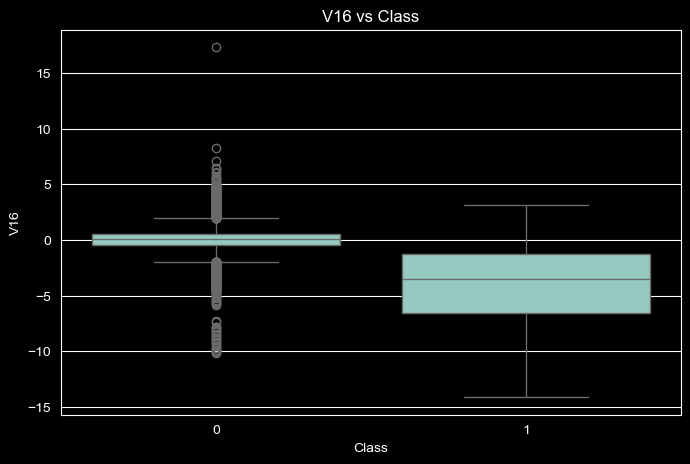


### Bivariate Analysis - V16 vs Class

**Statistics Comparison**

| Metric | Non-Fraud (Class 0) | Fraud (Class 1) |
|--------|--------------------|-----------------|
| Mean | 0.007 | -4.140 |
| Median | 0.067 | -3.550 |
| Standard Deviation | 0.845 | 3.865 |

**Observations**
- The feature **V16** is a PCA-transformed component, so its original meaning is not directly interpretable.
- The difference in distributions between fraud and non-fraud appears **strong**.
- This feature shows clear distribution differences between fraud and non-fraud transactions.

**Conclusion**
This feature may be useful for fraud detection when combined with other variables.

---


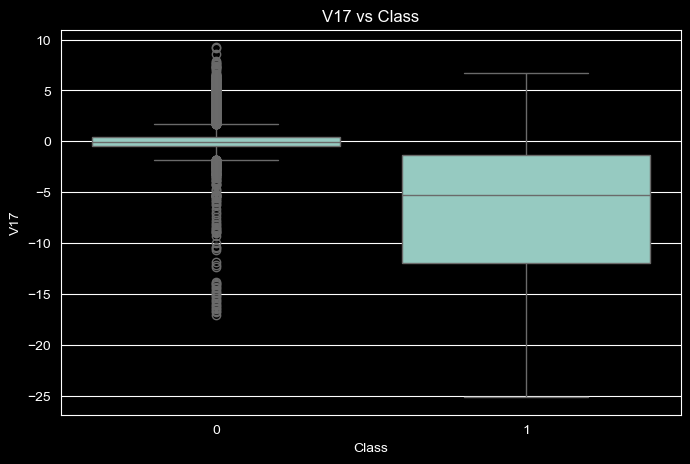


### Bivariate Analysis - V17 vs Class

**Statistics Comparison**

| Metric | Non-Fraud (Class 0) | Fraud (Class 1) |
|--------|--------------------|-----------------|
| Mean | 0.012 | -6.666 |
| Median | -0.065 | -5.303 |
| Standard Deviation | 0.749 | 6.971 |

**Observations**
- The feature **V17** is a PCA-transformed component, so its original meaning is not directly interpretable.
- The difference in distributions between fraud and non-fraud appears **strong**.
- This feature shows clear distribution differences between fraud and non-fraud transactions.

**Conclusion**
This feature may be useful for fraud detection when combined with other variables.

---


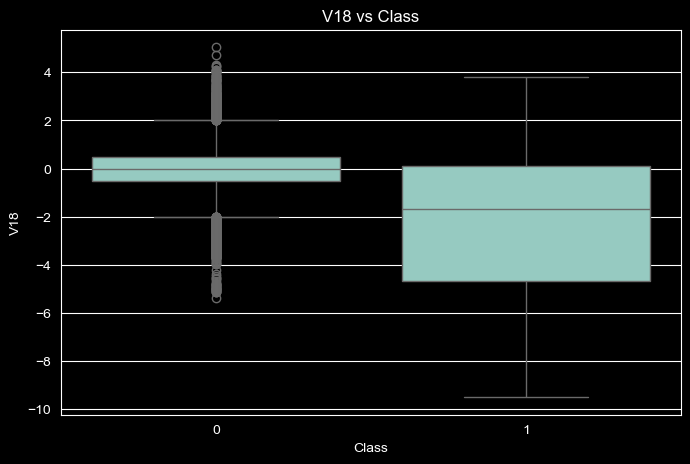


### Bivariate Analysis - V18 vs Class

**Statistics Comparison**

| Metric | Non-Fraud (Class 0) | Fraud (Class 1) |
|--------|--------------------|-----------------|
| Mean | 0.004 | -2.246 |
| Median | -0.003 | -1.664 |
| Standard Deviation | 0.825 | 2.899 |

**Observations**
- The feature **V18** is a PCA-transformed component, so its original meaning is not directly interpretable.
- The difference in distributions between fraud and non-fraud appears **strong**.
- This feature shows clear distribution differences between fraud and non-fraud transactions.

**Conclusion**
This feature may be useful for fraud detection when combined with other variables.

---


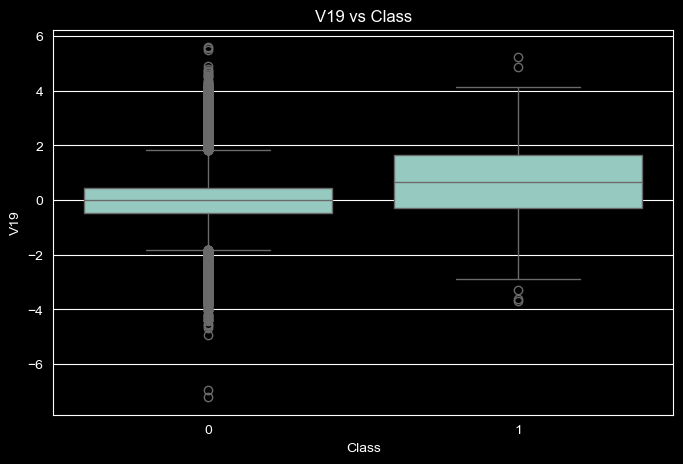


### Bivariate Analysis - V19 vs Class

**Statistics Comparison**

| Metric | Non-Fraud (Class 0) | Fraud (Class 1) |
|--------|--------------------|-----------------|
| Mean | -0.001 | 0.681 |
| Median | 0.003 | 0.647 |
| Standard Deviation | 0.812 | 1.540 |

**Observations**
- The feature **V19** is a PCA-transformed component, so its original meaning is not directly interpretable.
- The difference in distributions between fraud and non-fraud appears **moderate**.
- This feature shows some separation between fraud and non-fraud transactions.

**Conclusion**
This feature may be useful for fraud detection when combined with other variables.

---


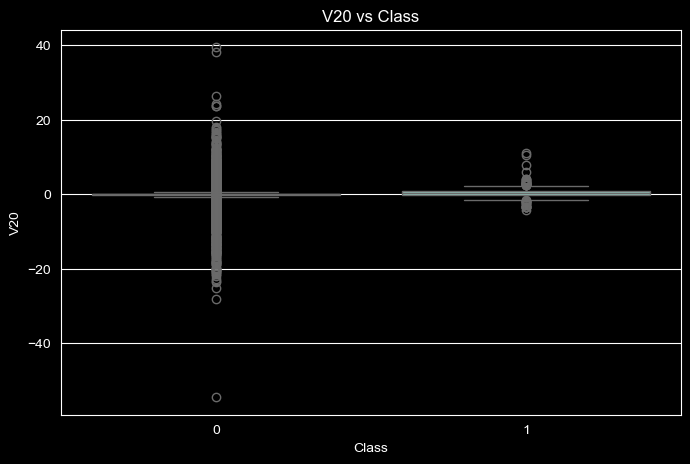


### Bivariate Analysis - V20 vs Class

**Statistics Comparison**

| Metric | Non-Fraud (Class 0) | Fraud (Class 1) |
|--------|--------------------|-----------------|
| Mean | -0.001 | 0.372 |
| Median | -0.063 | 0.285 |
| Standard Deviation | 0.769 | 1.347 |

**Observations**
- The feature **V20** is a PCA-transformed component, so its original meaning is not directly interpretable.
- The difference in distributions between fraud and non-fraud appears **weak**.
- This feature does not strongly separate fraud and non-fraud transactions.

**Conclusion**
This feature may have limited usefulness for fraud detection when combined with other variables.

---


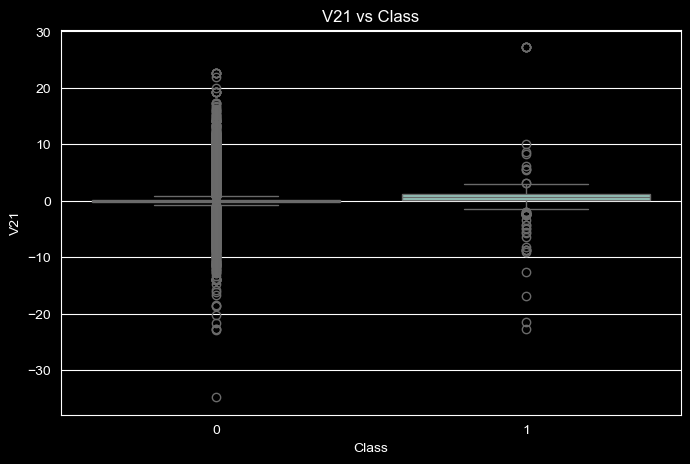


### Bivariate Analysis - V21 vs Class

**Statistics Comparison**

| Metric | Non-Fraud (Class 0) | Fraud (Class 1) |
|--------|--------------------|-----------------|
| Mean | -0.001 | 0.714 |
| Median | -0.030 | 0.592 |
| Standard Deviation | 0.717 | 3.869 |

**Observations**
- The feature **V21** is a PCA-transformed component, so its original meaning is not directly interpretable.
- The difference in distributions between fraud and non-fraud appears **weak**.
- This feature does not strongly separate fraud and non-fraud transactions.

**Conclusion**
This feature may have limited usefulness for fraud detection when combined with other variables.

---


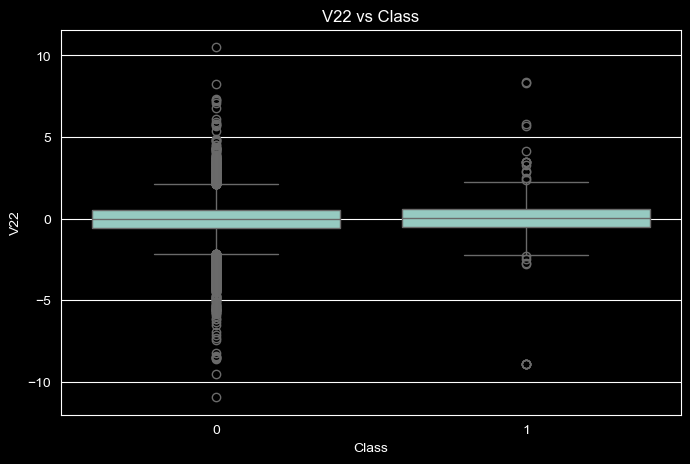


### Bivariate Analysis - V22 vs Class

**Statistics Comparison**

| Metric | Non-Fraud (Class 0) | Fraud (Class 1) |
|--------|--------------------|-----------------|
| Mean | -0.000 | 0.014 |
| Median | 0.007 | 0.048 |
| Standard Deviation | 0.724 | 1.495 |

**Observations**
- The feature **V22** is a PCA-transformed component, so its original meaning is not directly interpretable.
- The difference in distributions between fraud and non-fraud appears **weak**.
- This feature does not strongly separate fraud and non-fraud transactions.

**Conclusion**
This feature may have limited usefulness for fraud detection when combined with other variables.

---


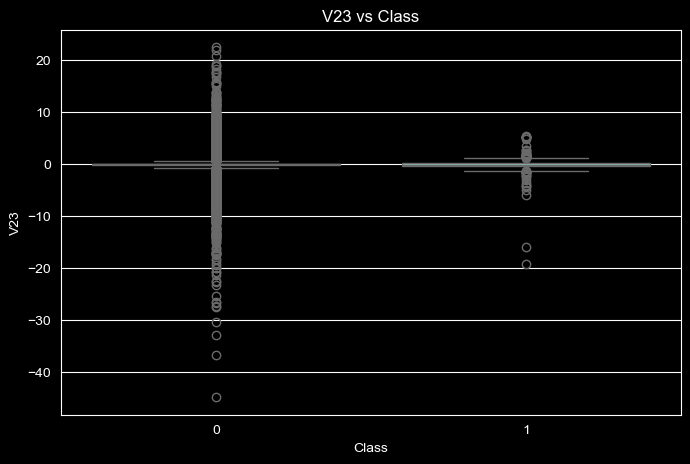


### Bivariate Analysis - V23 vs Class

**Statistics Comparison**

| Metric | Non-Fraud (Class 0) | Fraud (Class 1) |
|--------|--------------------|-----------------|
| Mean | 0.000 | -0.040 |
| Median | -0.011 | -0.073 |
| Standard Deviation | 0.622 | 1.580 |

**Observations**
- The feature **V23** is a PCA-transformed component, so its original meaning is not directly interpretable.
- The difference in distributions between fraud and non-fraud appears **weak**.
- This feature does not strongly separate fraud and non-fraud transactions.

**Conclusion**
This feature may have limited usefulness for fraud detection when combined with other variables.

---


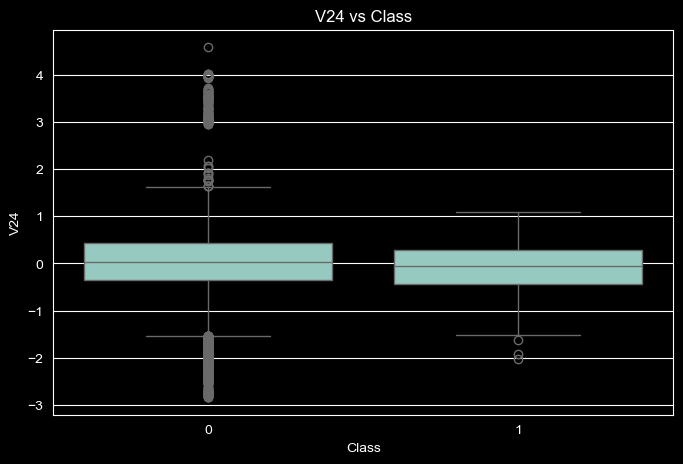


### Bivariate Analysis - V24 vs Class

**Statistics Comparison**

| Metric | Non-Fraud (Class 0) | Fraud (Class 1) |
|--------|--------------------|-----------------|
| Mean | 0.000 | -0.105 |
| Median | 0.041 | -0.061 |
| Standard Deviation | 0.606 | 0.516 |

**Observations**
- The feature **V24** is a PCA-transformed component, so its original meaning is not directly interpretable.
- The difference in distributions between fraud and non-fraud appears **weak**.
- This feature does not strongly separate fraud and non-fraud transactions.

**Conclusion**
This feature may have limited usefulness for fraud detection when combined with other variables.

---


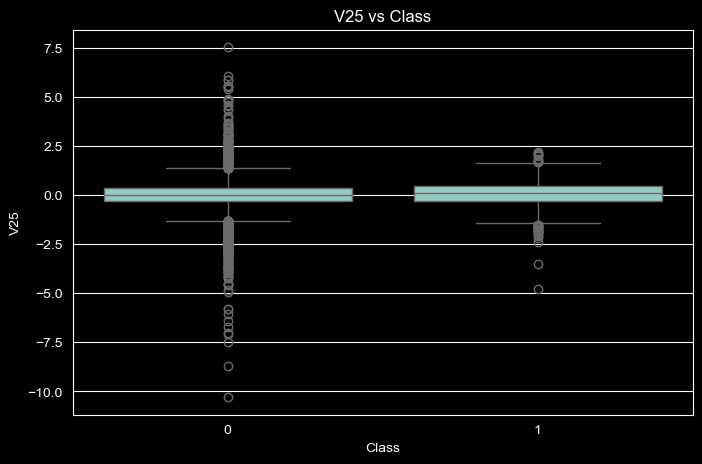


### Bivariate Analysis - V25 vs Class

**Statistics Comparison**

| Metric | Non-Fraud (Class 0) | Fraud (Class 1) |
|--------|--------------------|-----------------|
| Mean | -0.000 | 0.041 |
| Median | 0.016 | 0.088 |
| Standard Deviation | 0.521 | 0.797 |

**Observations**
- The feature **V25** is a PCA-transformed component, so its original meaning is not directly interpretable.
- The difference in distributions between fraud and non-fraud appears **weak**.
- This feature does not strongly separate fraud and non-fraud transactions.

**Conclusion**
This feature may have limited usefulness for fraud detection when combined with other variables.

---


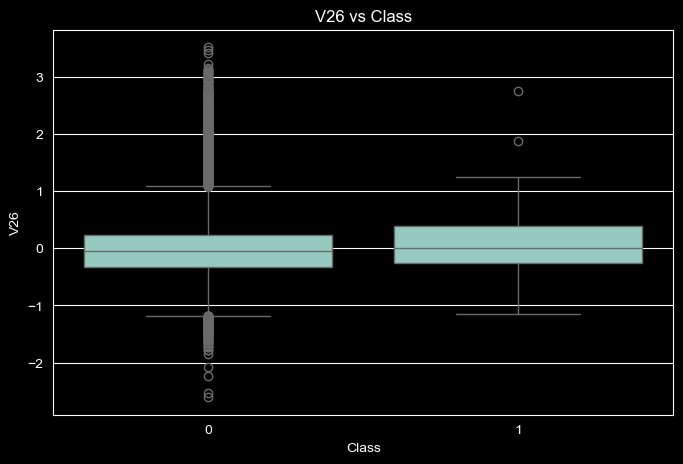


### Bivariate Analysis - V26 vs Class

**Statistics Comparison**

| Metric | Non-Fraud (Class 0) | Fraud (Class 1) |
|--------|--------------------|-----------------|
| Mean | -0.000 | 0.052 |
| Median | -0.052 | 0.004 |
| Standard Deviation | 0.482 | 0.472 |

**Observations**
- The feature **V26** is a PCA-transformed component, so its original meaning is not directly interpretable.
- The difference in distributions between fraud and non-fraud appears **weak**.
- This feature does not strongly separate fraud and non-fraud transactions.

**Conclusion**
This feature may have limited usefulness for fraud detection when combined with other variables.

---


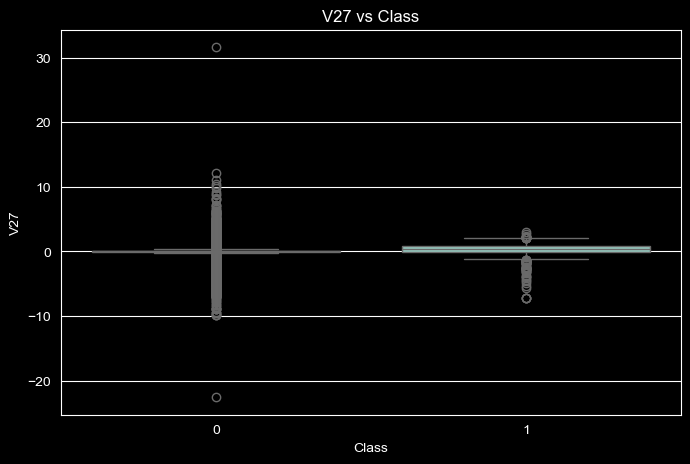


### Bivariate Analysis - V27 vs Class

**Statistics Comparison**

| Metric | Non-Fraud (Class 0) | Fraud (Class 1) |
|--------|--------------------|-----------------|
| Mean | -0.000 | 0.171 |
| Median | 0.001 | 0.395 |
| Standard Deviation | 0.400 | 1.377 |

**Observations**
- The feature **V27** is a PCA-transformed component, so its original meaning is not directly interpretable.
- The difference in distributions between fraud and non-fraud appears **weak**.
- This feature does not strongly separate fraud and non-fraud transactions.

**Conclusion**
This feature may have limited usefulness for fraud detection when combined with other variables.

---


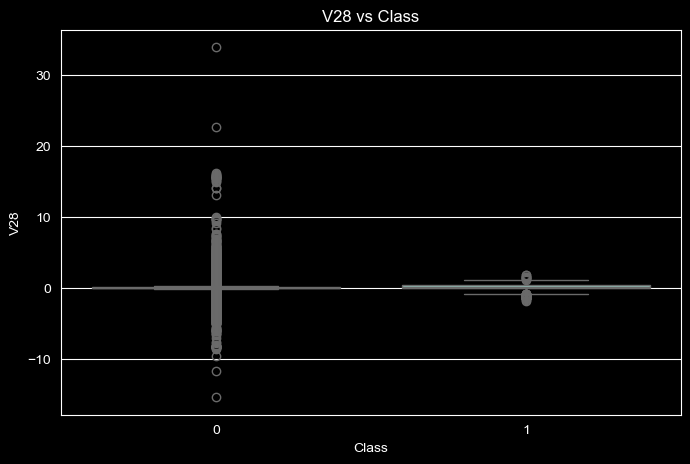


### Bivariate Analysis - V28 vs Class

**Statistics Comparison**

| Metric | Non-Fraud (Class 0) | Fraud (Class 1) |
|--------|--------------------|-----------------|
| Mean | -0.000 | 0.076 |
| Median | 0.011 | 0.146 |
| Standard Deviation | 0.330 | 0.547 |

**Observations**
- The feature **V28** is a PCA-transformed component, so its original meaning is not directly interpretable.
- The difference in distributions between fraud and non-fraud appears **weak**.
- This feature does not strongly separate fraud and non-fraud transactions.

**Conclusion**
This feature may have limited usefulness for fraud detection when combined with other variables.

---


## PCA Features Separation Summary

,Feature,Separation,Mean Diff,Average Std
0,V1,strong,4.780206,4.356750
1,V2,strong,3.630049,2.963681
2,V3,strong,7.045452,4.285183
3,V4,strong,4.549889,2.136325
4,V5,moderate,3.156678,3.364710
5,V6,moderate,1.400155,1.594018
6,V7,strong,5.578368,4.192793
7,V8,weak,0.571623,3.979557
8,V9,strong,2.585589,1.795134
9,V10,strong,5.686707,2.970772


In [14]:
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

features = ['V1','V2','V3','V4','V5']

# List to store summary info
summary_list = []

for col in num_cols:
    if col.startswith('V'):
        # Boxplot
        plt.figure(figsize=(8,5))
        sns.boxplot(x='Class', y=col, data=df)
        plt.title(f"{col} vs Class")
        plt.show()

        # Group statistics
        group_stats = df.groupby('Class')[col].agg(['mean','median','std'])

        mean_0 = group_stats.loc[0, 'mean']
        mean_1 = group_stats.loc[1, 'mean'] if 1 in group_stats.index else 0

        median_0 = group_stats.loc[0, 'median']
        median_1 = group_stats.loc[1, 'median'] if 1 in group_stats.index else 0

        std_0 = group_stats.loc[0, 'std']
        std_1 = group_stats.loc[1, 'std'] if 1 in group_stats.index else 0

        # Separation logic
        mean_diff = abs(mean_1 - mean_0)
        avg_std = (std_0 + std_1) / 2

        if mean_diff > avg_std:
            separation = "strong"
            interpretation = "This feature shows clear distribution differences between fraud and non-fraud transactions."
        elif mean_diff > avg_std * 0.5:
            separation = "moderate"
            interpretation = "This feature shows some separation between fraud and non-fraud transactions."
        else:
            separation = "weak"
            interpretation = "This feature does not strongly separate fraud and non-fraud transactions."

        # Add to summary list
        summary_list.append({
            'Feature': col,
            'Separation': separation,
            'Mean Diff': mean_diff,
            'Average Std': avg_std
        })

        # Individual Markdown
        markdown = f"""
### Bivariate Analysis - {col} vs Class

**Statistics Comparison**

| Metric | Non-Fraud (Class 0) | Fraud (Class 1) |
|--------|--------------------|-----------------|
| Mean | {mean_0:.3f} | {mean_1:.3f} |
| Median | {median_0:.3f} | {median_1:.3f} |
| Standard Deviation | {std_0:.3f} | {std_1:.3f} |

**Observations**
- The feature **{col}** is a PCA-transformed component, so its original meaning is not directly interpretable.
- The difference in distributions between fraud and non-fraud appears **{separation}**.
- {interpretation}

**Conclusion**
This feature may {'be useful' if separation!='weak' else 'have limited usefulness'} for fraud detection when combined with other variables.

---
"""
        display(Markdown(markdown))

# After loop: display summary table
summary_df = pd.DataFrame(summary_list)
display(Markdown("## PCA Features Separation Summary"))
display(summary_df)

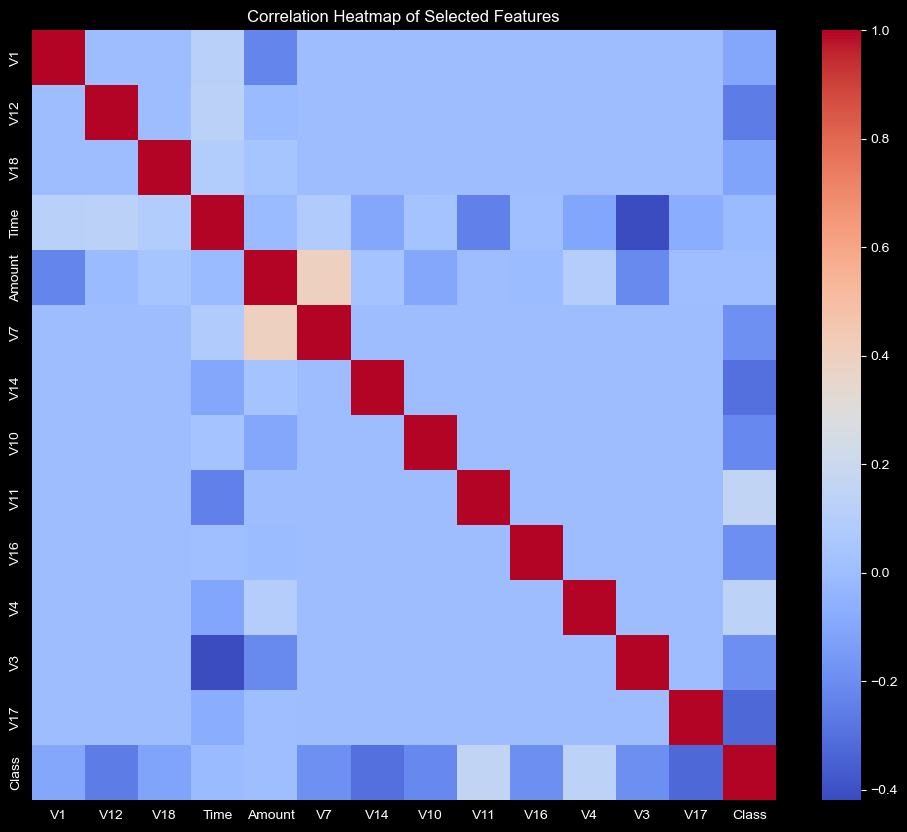


### Multivariate Analysis — Heatmap Interpretation

**Top Features Most Correlated with Fraud**
V11       0.154876
V4        0.133447
Amount    0.005632
Time     -0.012323
V1       -0.101347

**Observations**
- Features listed above show stronger relationships with fraudulent transactions.
- Heatmap helps visualize interactions among selected PCA features, Time, and Amount.
- Correlation patterns indicate which variables may contribute more to distinguishing fraud.

**Multicollinearity Check**
- Number of highly correlated feature pairs (>0.7): 0

**Conclusion**
The heatmap highlights key variables associated with fraud and reveals relationships among predictors. These insights support feature selection and help guide further modeling steps.

---


In [15]:
from IPython.display import display, Markdown
import seaborn as sns
import matplotlib.pyplot as plt

# --- Correlation with target ---
corr_with_target = df.corr()['Class'].abs()
threshold = 0.1

selected_features = corr_with_target[
    (corr_with_target > threshold) & (corr_with_target.index != 'Class')
].index.tolist()

# add interpretable features
selected_features += ['Time','Amount']
selected_features = list(set(selected_features))

# dataframe for heatmap
heatmap_df = df[selected_features + ['Class']]

# --- Plot heatmap ---
plt.figure(figsize=(12,10))
sns.heatmap(heatmap_df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Selected Features")
plt.show()

# --- Analysis ---
corr_matrix = heatmap_df.corr()

# strongest correlations with fraud
fraud_corr = corr_matrix['Class'].drop('Class').sort_values(ascending=False)
top_features = fraud_corr.head(5)

# detect multicollinearity
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i,j]) > 0.7:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))

# --- Markdown ---
markdown = f"""
### Multivariate Analysis — Heatmap Interpretation

**Top Features Most Correlated with Fraud**
{top_features.to_string()}

**Observations**
- Features listed above show stronger relationships with fraudulent transactions.
- Heatmap helps visualize interactions among selected PCA features, Time, and Amount.
- Correlation patterns indicate which variables may contribute more to distinguishing fraud.

**Multicollinearity Check**
- Number of highly correlated feature pairs (>0.7): {len(high_corr_pairs)}

**Conclusion**
The heatmap highlights key variables associated with fraud and reveals relationships among predictors. These insights support feature selection and help guide further modeling steps.

---
"""

display(Markdown(markdown))

DATA CLEANING

In [16]:
#checking for null vlaues for data cleaning
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

since there are no null values we dont need to replace wiht mean mode or anything else


In [17]:
# Check for total count of exact row duplicates
duplicate_count = df.duplicated().sum()
print(f"Total duplicate rows found: {duplicate_count}")

Total duplicate rows found: 1081


now checking if the duplicates are from class 0 or class1 if the duplicates are from minority class 1 then they shouldnot be deleted

In [18]:
# 1. Sort by Time (crucial for diff calculation)
df_sorted = df.sort_values(by=['Time', 'Amount'])

# 2. Calculate the time difference between the current and previous row
df_sorted['time_diff'] = df_sorted['Time'].diff()

# 3. Calculate the amount difference between the current and previous row
df_sorted['amount_diff'] = df_sorted['Amount'].diff()

# 4. Define your threshold (e.g., epsilon = 2 seconds)
epsilon = 2

# 5. Filter for rows where amount is the same (diff=0) and time is very close
# 5. Filter for Normal (Class 0) rows that are also 'Double-Taps'
normal_logical_duplicates = df_sorted[
    (df_sorted['amount_diff'] == 0) &
    (df_sorted['time_diff'] <= epsilon) &
    (df_sorted['Class'] == 0) # Only look at Normal transactions
]

print(f"Normal 'Double-Tap' duplicates to be removed: {len(normal_logical_duplicates)}")

# 6. To actually remove them from your main dataframe:
df_cleaned = df_sorted.drop(normal_logical_duplicates.index)

Normal 'Double-Tap' duplicates to be removed: 6110


In [19]:
#recording index of duplicate in rows_to_drop
rows_to_drop=normal_logical_duplicates.index
#deleting those index from our sorted df
df_cleaned=df_sorted.drop(index=rows_to_drop)

print(f"orignal shape:{df_sorted.shape}")
print(f"new shape:{df_cleaned.shape}")
print(f"rows removed:{len(rows_to_drop)}")

orignal shape:(284807, 33)
new shape:(278697, 33)
rows removed:6110


In [20]:
#checking class balance
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

feature engineering

In [21]:
#log transforming amount as transaction amounts are highly skewed only low amounts
#pca features are already normalized so to match that log amount
df['Amount_log']=np.log1p(df['Amount'])


#extracting hrs from time
df['hours']=(df['Time']//3600)%24

In [22]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 1. Split the data first
#axis=1 means remove column named class
X=df.drop('Class',axis=1)
y=df['Class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
# 2. Define a pipeline that scales AND then applies SMOTE only to training data
pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('smote',SMOTE()),
    ('model',LogisticRegression())
])

# 3. Fit the pipeline (SMOTE only happens on X_train here)
pipeline.fit(X_train, y_train)

#predict
y_pred=pipeline.predict(X_test)

In [23]:
#evaluation
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[55302  1562]
 [    8    90]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962



confusion matrix is 55292 1572
                    8     90

55292 means true negative  55292 were actually non fraud and then predicted as non fraud

1572 ,false positive means 1572 cases werenot fraud but given fraud tag

8 ,false negative means 8 were fraud but not given fraud tag

90 true positive means 90 were actually fraud and indentified as fraud


precision for class 1 ie fraud class is 0.05 which means only 5 % of fraud tags were correctly predicted other 95% prediction of fraud were false alamrs

recall is 0.92 means 92% fraud cases were found of all fraud cases in data

then f1 is only 0.10 as precision is very low and support is (98 fraud vs  56864 nonfraud

this result shows oversenstivity the model precits everything as frauds due to using smote technique being 50/50 ratio.basically our dataset had very low fraud class but when we applied smote we oversampled the minority class ie fraud class so the models decision making capability were affected so it predicted many false alarms .to solve this set sampling statergy parameter manually telling smote exactly in what ratio it should oversmaple minority class

also we can change the threshold
The threshold is the decision cutoff that converts a model's probability score (0 to 1) into a final label. By default, it is 0.5, but raising it to 0.9 means you only flag fraud when the model is 90% certain, which drastically cuts down on false alarms. For example, a transaction with a 0.7 probability is flagged as "Fraud" at the default level, but if you raise the threshold to 0.8, that same transaction is now correctly ignored as "Legitimate," saving a customer from a declined card.

In [24]:
#applying manual threshold instead of default 0.5

#getting probabilities if class 1
y_prob=pipeline.predict_proba(X_test)[:,1]

#setting threshold
threshold=0.9
y_pred_custom=(y_prob>=threshold).astype(int)

print(f"result woth custom threshold:{threshold}")
print(f"confusion matrix:{confusion_matrix(y_test,y_pred_custom)}")
print(f"classificatoin report:{classification_report(y_test,y_pred_custom)}")

result woth custom threshold:0.9
confusion matrix:[[56479   385]
 [   11    87]]
classificatoin report:              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.18      0.89      0.31        98

    accuracy                           0.99     56962
   macro avg       0.59      0.94      0.65     56962
weighted avg       1.00      0.99      1.00     56962



visualization:

1.confusion matrix heatmap

2.roc curves

3.precision-recall curve

4.feature importance



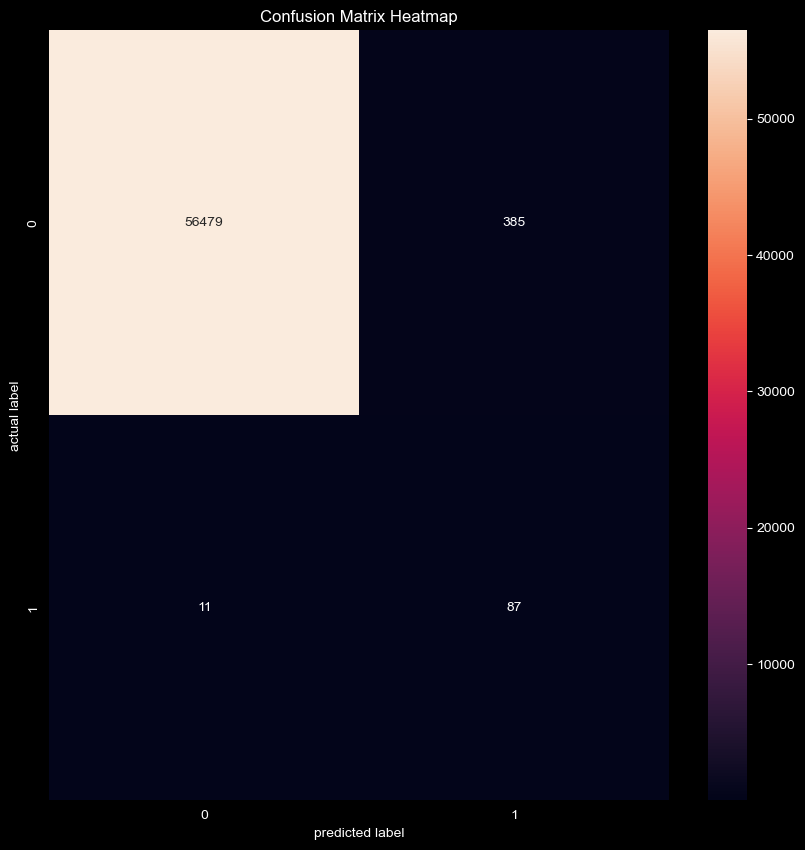

In [25]:
#confusion matrix heatmap
cm=confusion_matrix(y_test,y_pred_custom)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('predicted label')
plt.ylabel('actual label')
plt.show()

Interpretation
1.56476 cases were accurately predicted as class 0 cases

2.87 cases were accurately predicted as class 1 cases

3.388 cases were falsely accused of being case 1 when they were non fraud(type I error)

4.11 cases were flagged as non fraud when they were actually fraud.

now for performance analysis:
recall is tp/tp+fn=87/(87+11)=88.8% so the model catches 88.8% of total fraud cases.

precsion is tp/tp+fp=87/(87+388)=18.3% so the model's prediction for fraud case is only 18.3%

speicificity=56476=(56476+388)=99.3% so the model is very good at not mislabelling the class.

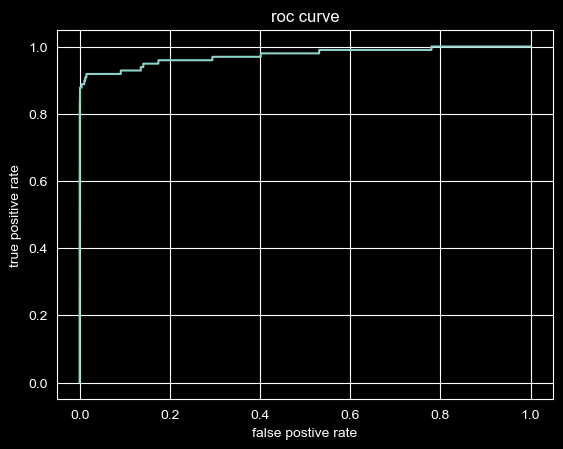

In [26]:
#roc curve
from sklearn.metrics import roc_curve,auc

y_prob=pipeline.predict_proba(X_test)[:,1]

fpr,tpr,_=roc_curve(y_test,y_prob)
roc_auc=auc(fpr,tpr)

plt.plot(fpr,tpr)
plt.xlabel("false postive rate")
plt.ylabel("true positive rate")
plt.title("roc curve")
plt.show()

interpretation of roc_auc curve
auc_roc curve is a graph used to check how well binary classification model works.it helps us to understand how well model separates the positive cases from negative cases.
it plots tpr(correct prediction of positive case) and fpr(incorrect prediction ie predicting postive cases as negative cases)
after we plot ,we look at area under curve (auc) if the area under curve is largee the ml is good if its smaller than the diagonal of curve ml is useless

since in this case the auc is 1.0-0.9 the model is excellent at prediciting between positive cases and negative cases.

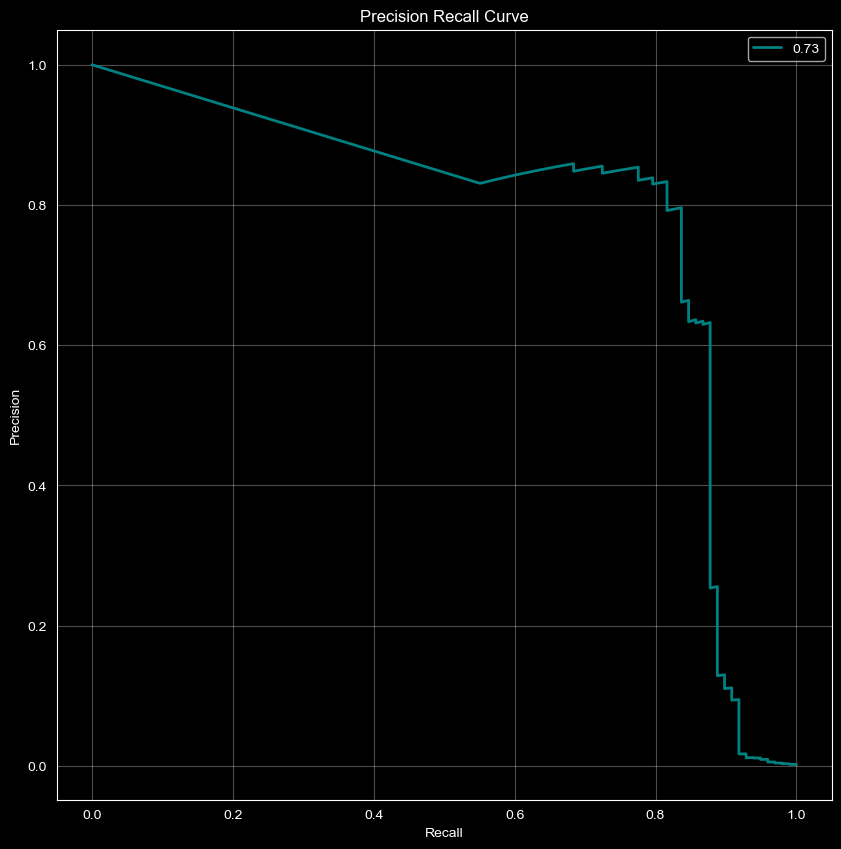

In [29]:
#precision recall curve
precision,recall,_=precision_recall_curve(y_test,y_prob)
avg_precision=average_precision_score(y_test,y_prob)

plt.figure(figsize=(10,10))
plt.plot(recall, precision, color='teal', lw=2, label=f'{avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.legend(loc='upper right')
plt.grid(alpha=0.3)

plt.show()

interpretation of precision-recall curve
precision-recall curve helps to know actually how many fraud cases that we predicted were actually true and then
recall means of all fraud cases hwo many did we catch


whwn interpreting the curve if the graph hugs top right corner the model works excellently and then if it hugs low right it means low precision high recall

precision recall curve is very important in cases like fraud detection,disease prediction cases
in this plot we can see that the model predicts almost correctly for first 0.85% cases then it suddenly hits rock bottom for remainig 0.15%

also the average precision is 0.73 whihc means the model is decent but not good enough.

Classical classification models (core / traditional)

Logistic Regression

Decision Tree

Random Forest

Support Vector Machine (SVM)

K-Nearest Neighbors (KNN)

Naive Bayes

Linear Discriminant Analysis (LDA)

Quadratic Discriminant Analysis (QDA)

Gradient Boosting (basic)

AdaBoost

Extra Trees

Neural Network (MLP — classical shallow)

✅ Good models for fraud detection (imbalanced data)

Logistic Regression (with class weights)

Random Forest

Gradient Boosting

XGBoost

LightGBM

CatBoost

Support Vector Machine (with class weights)

Isolation Forest (unsupervised anomaly detection)

One-Class SVM

Local Outlier Factor (LOF)

Autoencoder (anomaly detection)